<div style=" background-color: RGB(24,29,198);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python
</h2>

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers</h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">1.1 - Importation des librairies</h3>

In [1]:
# Importation des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from statsmodels.stats.stattools import durbin_watson

In [2]:
sns.set()

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">1.2 - Chargement du fichier csv</h3>

In [3]:
# Importation du fichier

df = pd.read_csv('billets.csv', sep=';')

In [4]:
df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

## Dictionnaire des données :

- length : longueur des billets en mm

- height_left : hauteur à gauche en mm

- height_right : hauteur à droite en mm

- margin_up : hauteur entre bord supérieur et image du billet en mm

- margin_low : hauteur entre bord inférieur et image du billet en mm

- diagonal : diagonale du billet en mm

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse descriptive univariée sur la base globale </h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.1 - Première analyse exploratoire</h3>

In [5]:
# Principales statistiques de l'ensemble

df.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [6]:
# à première vue : pas de valeurs négatives, un écart-type plus important dans les variables margin_low et length, 
# à noter pour vérifier si présence de valeurs atypiques / aberrantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [8]:
# Nombre de vrais / faux billets

df.is_genuine.value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [9]:
# Vérification de doublons sur des lignes entières 

df.duplicated().sum()

0

In [10]:
# Nombre de valeurs manquantes

df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [11]:
# On note la présence de 37 valeurs manquantes sur la variable margin_low

In [12]:
# Sauvegarde du df original dans une copie

df_original = df.copy()

In [13]:
# pip install missingno
# import missingno as msno

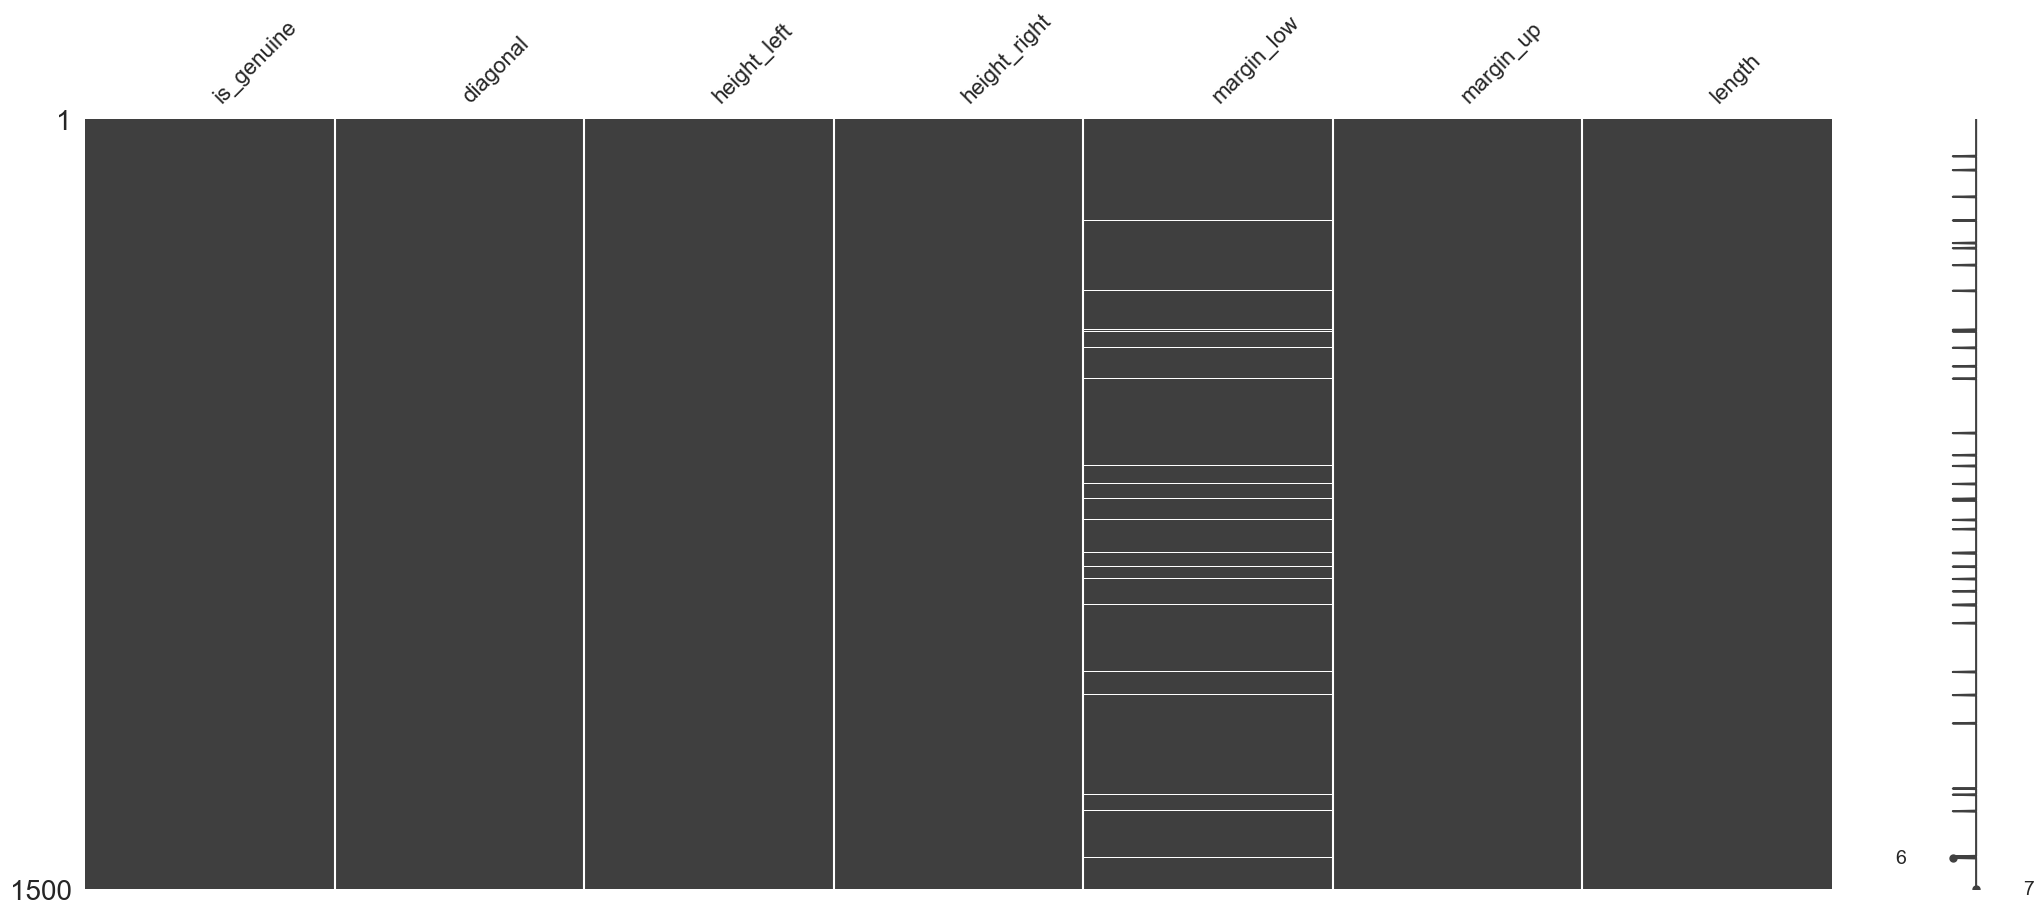

In [14]:
# Analyse visuelle des valeurs manquantes 

msno.matrix(df)
plt.show()

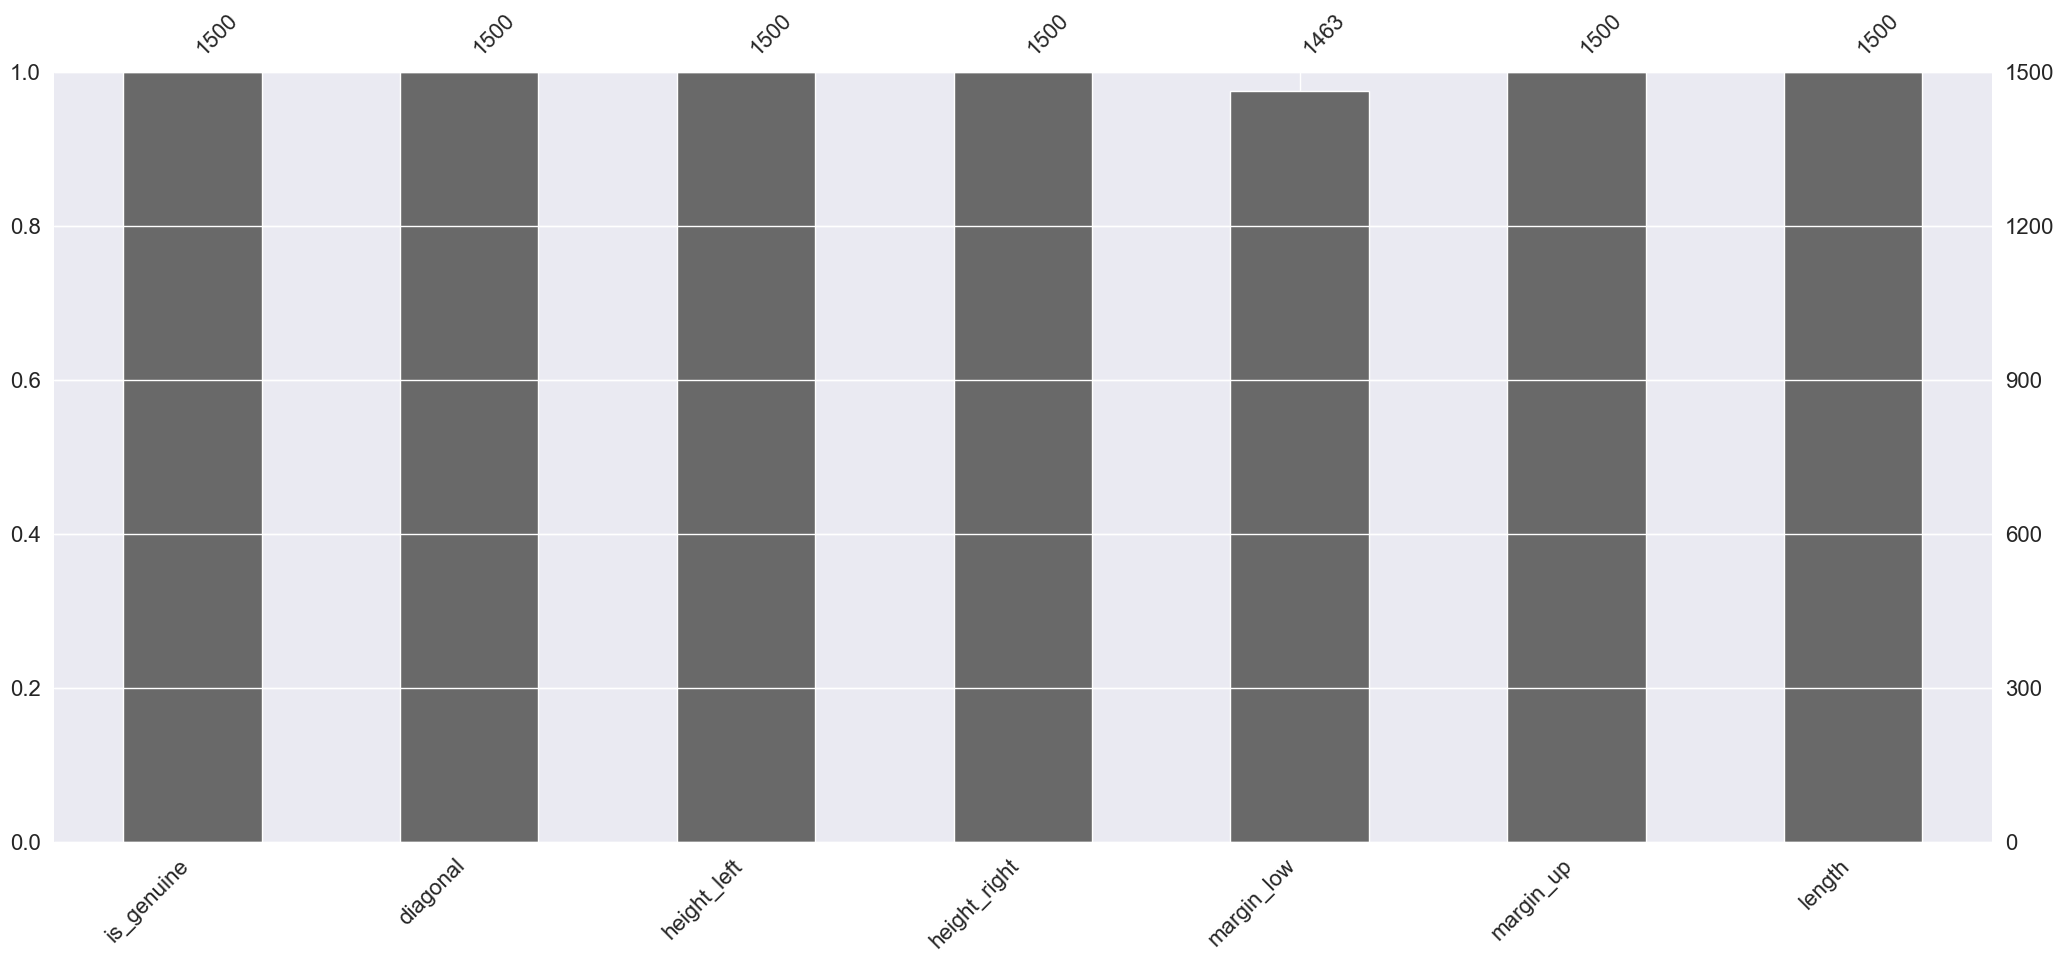

In [15]:
msno.bar(df)
plt.show()

In [16]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

              Missing Values  Percentage
is_genuine                 0    0.000000
diagonal                   0    0.000000
height_left                0    0.000000
height_right               0    0.000000
margin_low                37    2.466667
margin_up                  0    0.000000
length                     0    0.000000


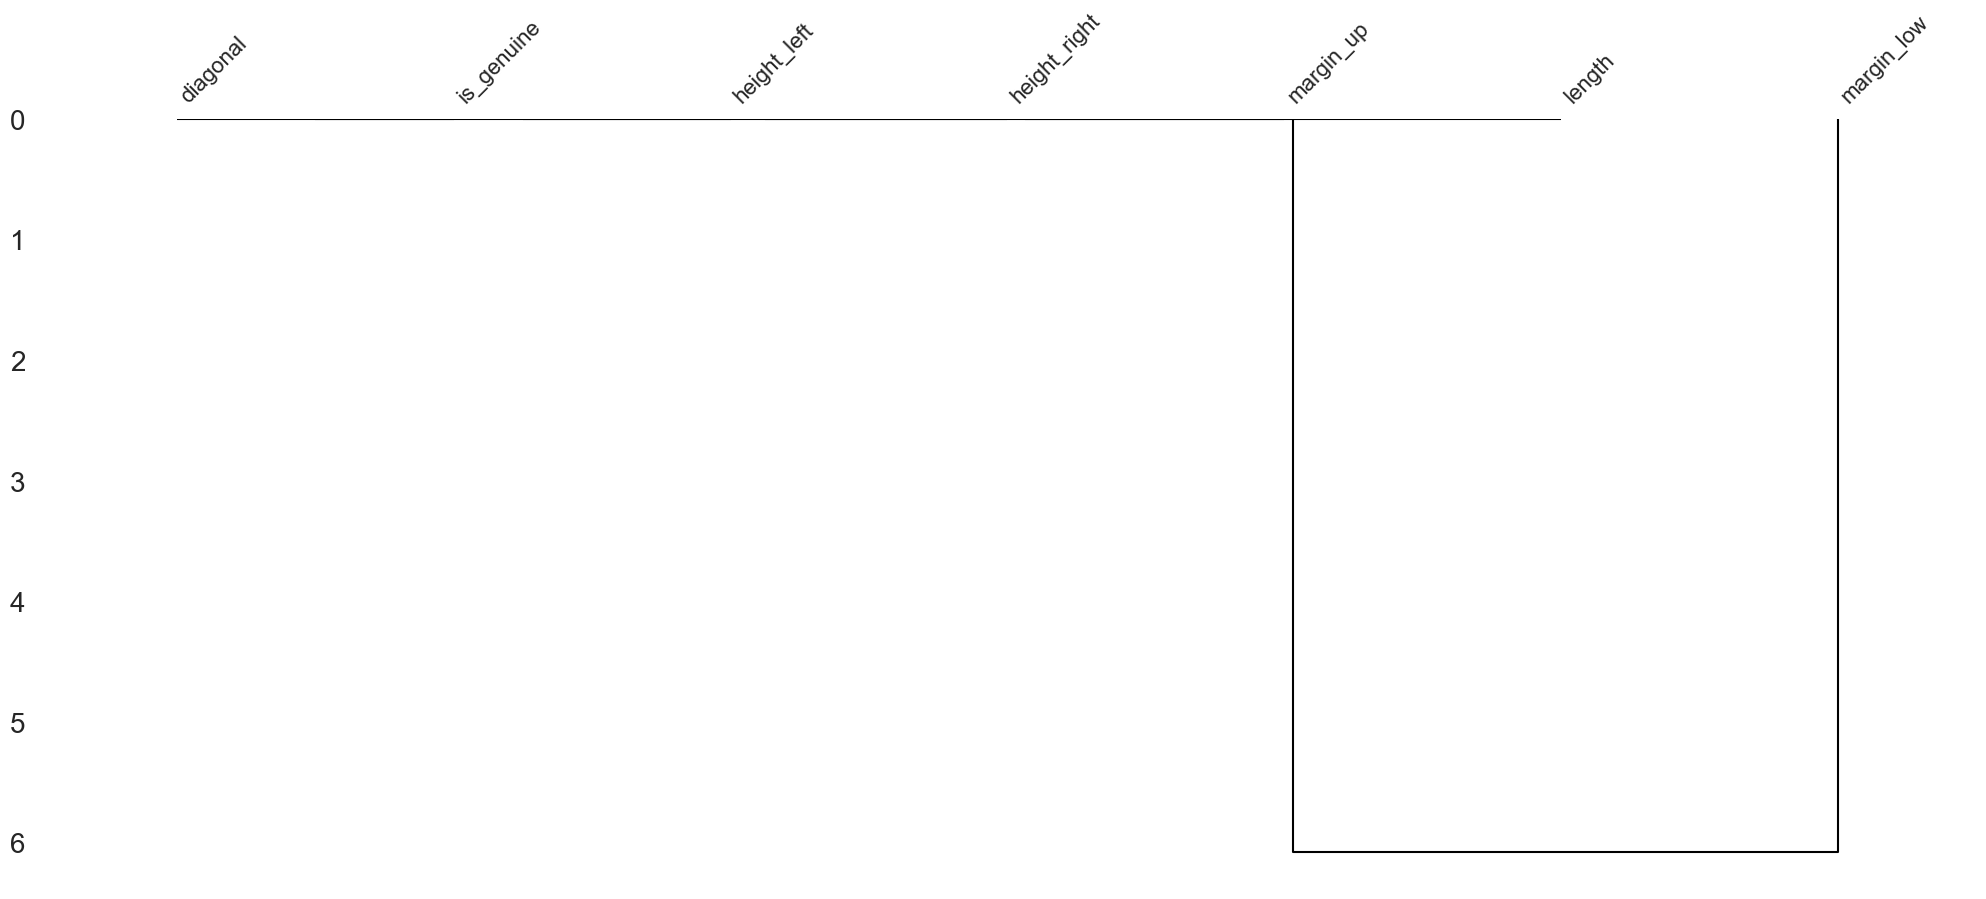

In [17]:
# Analyser la corrélation entre les valeurs manquantes
msno.dendrogram(df)
plt.show()

In [18]:
# Il sera potentiellement possible de calculer les valeurs manquantes grâce au lien avec margin_up, qui n'a pas de manquants 

# Je décide donc de retirer les valeurs nulles pour le moment, et d'étudier plus en détails les données et leurs relations

In [19]:
# Extraction des valeurs manquantes dans un df à part

df_nan = df.loc[df['margin_low'].isnull(),:]
df_nan

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [20]:
# retrait des nan et verif 

df = df.drop(df_nan.index, axis=0)
df_nan.shape

(37, 7)

In [21]:
# Principales statistiques des vrais billets

df_vrais = df.loc[df['is_genuine'] == True,:].copy()
df_vrais.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  971.000000   971.000000    971.000000  971.000000  971.000000   
mean   171.988476   103.951679    103.809094    4.116097    3.052544   
std      0.301402     0.301518      0.288862    0.319124    0.185425   
min    171.040000   103.140000    102.910000    2.980000    2.270000   
25%    171.790000   103.745000    103.610000    3.905000    2.925000   
50%    171.990000   103.950000    103.810000    4.110000    3.050000   
75%    172.200000   104.140000    104.000000    4.340000    3.180000   
max    172.920000   104.860000    104.950000    5.040000    3.740000   

           length  
count  971.000000  
mean   113.203059  
std      0.356123  
min    111.760000  
25%    112.960000  
50%    113.200000  
75%    113.460000  
max    114.320000

In [22]:
df_vrais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    971 non-null    bool   
 1   diagonal      971 non-null    float64
 2   height_left   971 non-null    float64
 3   height_right  971 non-null    float64
 4   margin_low    971 non-null    float64
 5   margin_up     971 non-null    float64
 6   length        971 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 54.0 KB


In [23]:
# Principales statistiques des faux billets

df_faux = df.loc[df['is_genuine'] == False,:].copy()
df_faux.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  492.000000   492.000000    492.000000  492.000000  492.000000   
mean   171.901402   104.188537    104.143272    5.215935    3.351504   
std      0.305473     0.224418      0.271683    0.553531    0.179343   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.697500   104.040000    103.950000    4.840000    3.227500   
50%    171.910000   104.180000    104.160000    5.190000    3.350000   
75%    172.092500   104.330000    104.320000    5.592500    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  492.000000  
mean   111.632114  
std      0.615343  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

In [24]:
df_faux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    492 non-null    bool   
 1   diagonal      492 non-null    float64
 2   height_left   492 non-null    float64
 3   height_right  492 non-null    float64
 4   margin_low    492 non-null    float64
 5   margin_up     492 non-null    float64
 6   length        492 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 27.4 KB


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.2 - Analyse de la variable is_genuine  </h3>

In [25]:
# Nombre de vrais / faux billets sans valeurs nulles

df.is_genuine.value_counts()

True     971
False    492
Name: is_genuine, dtype: int64

In [26]:
# Calcul de la fréquence

pd.crosstab(df.is_genuine, "freq")

col_0       freq
is_genuine      
False        492
True         971

In [27]:
# En pourcentage

pd.crosstab(df.is_genuine, "freq", normalize=True)

col_0           freq
is_genuine          
False       0.336295
True        0.663705

<Axes: xlabel='is_genuine'>

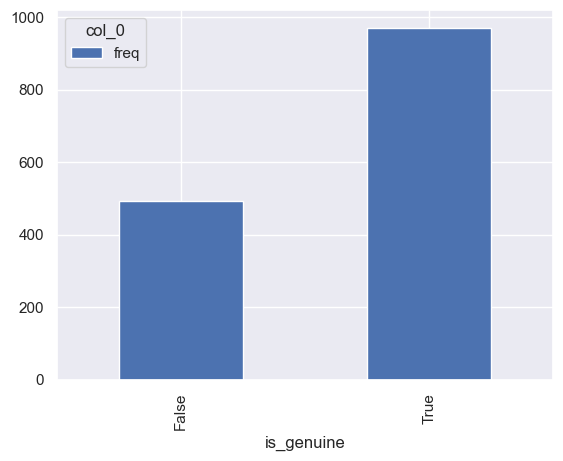

In [28]:
# Visualisation de la répartition

t = pd.crosstab(df.is_genuine, "freq")
t.plot.bar()

array([<Axes: ylabel='freq'>], dtype=object)

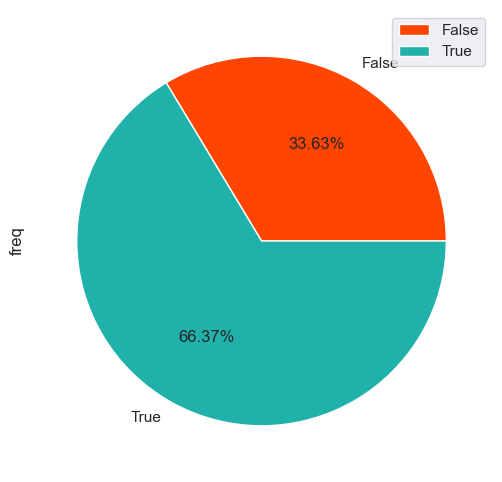

In [29]:
# Visualisation de la fréquence de chaque catégorie

t = pd.crosstab(df.is_genuine, "freq")
t.plot.pie(subplots=True, figsize = (6, 6), autopct= '%.2f%%', colors = ['orangered','lightseagreen'])

In [30]:
# Transformation des catégories en 0 et 1 

# 1 -> vrais billets
# 0 -> faux billets

# Conversion du type de billet en 0 et 1 : 

def set_values(row, value):
    return value[row]
   
map_dictionary ={ True : 1, False : 0} 
   
df['is_genuine'] = df['is_genuine'].apply(set_values, args =(map_dictionary, )) 
df.head(20)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0            1    171.81       104.86        104.95        4.52       2.89   
1            1    171.46       103.36        103.66        3.77       2.99   
2            1    172.69       104.48        103.50        4.40       2.94   
3            1    171.36       103.91        103.94        3.62       3.01   
4            1    171.73       104.28        103.46        4.04       3.48   
5            1    172.17       103.74        104.08        4.42       2.95   
6            1    172.34       104.18        103.85        4.58       3.26   
7            1    171.88       103.76        104.08        3.98       2.92   
8            1    172.47       103.92        103.67        4.00       3.25   
9            1    172.47       104.07        104.02        4.04       3.25   
10           1    171.83       104.14        103.62        3.16       3.18   
11           1    171.84       104.59        104.00        3.88       3.27   
12           1    171.89       103.89        103.40        4.11       2.96   
13           1    172.20       104.35        103.67        4.44       3.38   
14           1    172.06       103.87        103.83        4.09       2.92   
15           1    171.73       103.92        103.74        4.43       2.78   
16           1    171.30       104.19        103.70        4.12       2.82   
17           1    171.88       104.47        103.45        4.56       3.33   
18           1    172.47       103.89        104.14        3.74       3.28   
19           1    171.90       103.67        103.15        4.55       3.15   

    length  
0   112.83  
1   113.09  
2   113.16  
3   113.51  
4   112.54  
5   112.81  
6   112.81  
7   113.08  
8   112.85  
9   113.45  
10  113.22  
11  113.08  
12  113.24  
13  113.65  
14  113.19  
15  112.98  
16  112.87  
17  113.01  
18  113.47  
19  113.12

In [31]:
# Vérification

df.tail(20)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1480           0    171.64       103.92        104.66        5.71       3.38   
1481           0    172.17       104.33        104.53        5.06       3.71   
1482           0    172.30       104.04        103.85        4.12       3.27   
1483           0    172.08       104.16        104.58        4.79       3.72   
1484           0    172.08       103.96        104.95        5.22       3.45   
1485           0    172.52       104.48        104.17        5.16       3.39   
1486           0    172.47       104.16        103.85        3.99       3.32   
1487           0    171.30       104.49        103.89        4.88       3.17   
1488           0    171.78       103.93        103.93        5.88       3.19   
1489           0    172.11       104.14        104.15        4.84       3.28   
1490           0    171.82       104.32        104.05        6.06       3.03   
1491           0    171.79       104.18        104.54        5.13       3.51   
1492           0    172.01       103.97        104.40        5.52       3.31   
1493           0    171.63       104.33        104.61        4.88       3.35   
1494           0    171.57       104.14        104.14        5.41       3.23   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
1480  112.33  
1481  111.75  
1482  111.69  
1483  111.04  
1484  112.07  
1485  110.71  
1486  111.25  
1487  111.51  
1488  111.07  
1489  110.98  
1490  111.68  
1491  112.40  
1492  111.18  
1493  112.16  
1494  111.76  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07

In [32]:
df.is_genuine.value_counts()

1    971
0    492
Name: is_genuine, dtype: int64

In [33]:
# Application sur le df des nan 

df_nan['is_genuine'] = df_nan['is_genuine'].apply(set_values, args =(map_dictionary, )) 
df_nan

C:\Users\leacr\AppData\Local\Temp\ipykernel_16992\3910347730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['is_genuine'] = df_nan['is_genuine'].apply(set_values, args =(map_dictionary, ))


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72             1    171.94       103.89        103.45         NaN       3.25   
99             1    171.93       104.07        104.18         NaN       3.14   
151            1    172.07       103.80        104.38         NaN       3.02   
197            1    171.45       103.66        103.80         NaN       3.62   
241            1    171.83       104.14        104.06         NaN       3.02   
251            1    171.80       103.26        102.82         NaN       2.95   
284            1    171.92       103.83        103.76         NaN       3.23   
334            1    171.85       103.70        103.96         NaN       3.00   
410            1    172.56       103.72        103.51         NaN       3.12   
413            1    172.30       103.66        103.50         NaN       3.16   
445            1    172.34       104.42        103.22         NaN       3.01   
481            1    171.81       103.53        103.96         NaN       2.71   
505            1    172.01       103.97        104.05         NaN       2.98   
611            1    171.80       103.68        103.49         NaN       3.30   
654            1    171.97       103.69        103.54         NaN       2.70   
675            1    171.60       103.85        103.91         NaN       2.56   
710            1    172.03       103.97        103.86         NaN       3.07   
739            1    172.07       103.74        103.76         NaN       3.09   
742            1    172.14       104.06        103.96         NaN       3.24   
780            1    172.41       103.95        103.79         NaN       3.13   
798            1    171.96       103.84        103.62         NaN       3.01   
844            1    171.62       104.14        104.49         NaN       2.99   
845            1    172.02       104.21        104.05         NaN       2.90   
871            1    171.37       104.07        103.75         NaN       3.07   
895            1    171.81       103.68        103.80         NaN       2.98   
919            1    171.92       103.68        103.45         NaN       2.58   
945            1    172.09       103.74        103.52         NaN       3.02   
946            1    171.63       103.87        104.66         NaN       3.27   
981            1    172.02       104.23        103.72         NaN       2.99   
1076           0    171.57       104.27        104.44         NaN       3.21   
1121           0    171.40       104.38        104.19         NaN       3.17   
1176           0    171.59       104.05        103.94         NaN       3.02   
1303           0    172.17       104.49        103.76         NaN       2.93   
1315           0    172.08       104.15        104.17         NaN       3.40   
1347           0    171.72       104.46        104.12         NaN       3.61   
1435           0    172.66       104.33        104.41         NaN       3.56   
1438           0    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.3 - Analyse de la variable diagonal  </h3>

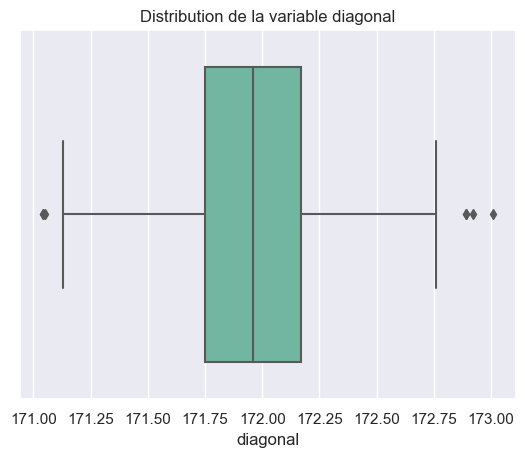

In [34]:
# Analyse de la dispersion 

sns.boxplot(x='diagonal', data=df, palette="Set2")
plt.title('Distribution de la variable diagonal')
plt.show()

In [35]:
df.diagonal.describe()

count    1463.000000
mean      171.959193
std         0.305457
min       171.040000
25%       171.750000
50%       171.960000
75%       172.170000
max       173.010000
Name: diagonal, dtype: float64

In [36]:
df.diagonal.var()

0.09330413697469724

In [37]:
df.diagonal.mode()

0    171.99
Name: diagonal, dtype: float64

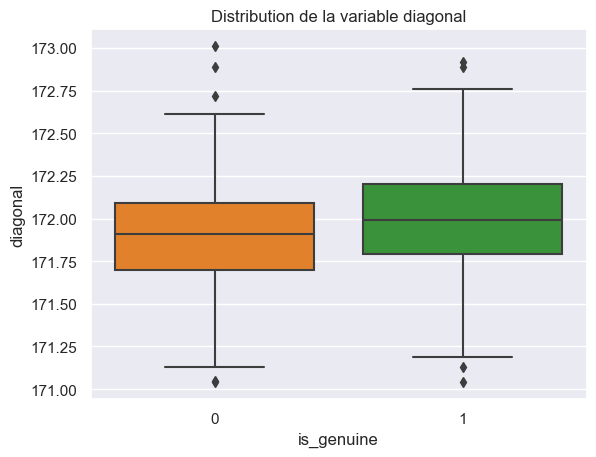

In [38]:
# Visualisation des tendances centrales et de la dispersion 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='diagonal', data=df, palette=my_palette)
plt.title('Distribution de la variable diagonal')
plt.show()

On note une tendance centrale légèrement plus faible pour les faux billets, ainsi qu'une dispersion un peu moins étalée (au niveau du 3e écart inter-quartile)

La médiane d'un vrai billet se situe à 171.99 mm alors que celle d'un faux est de 171.91 mm 

La moyenne d'un vrai billet est de 171.99 alors que celle d'un faux est de 171.90 mm

Cependant, ces variations sont très légères. Il existe peut être des différences plus importantes au sein d'autres variables

In [39]:
df_vrais.diagonal.describe()

count    971.000000
mean     171.988476
std        0.301402
min      171.040000
25%      171.790000
50%      171.990000
75%      172.200000
max      172.920000
Name: diagonal, dtype: float64

In [40]:
df_vrais.diagonal.mode()

0    171.99
Name: diagonal, dtype: float64

In [41]:
df_faux.diagonal.describe()

count    492.000000
mean     171.901402
std        0.305473
min      171.040000
25%      171.697500
50%      171.910000
75%      172.092500
max      173.010000
Name: diagonal, dtype: float64

In [42]:
df_faux.diagonal.mode()

0    171.94
Name: diagonal, dtype: float64

In [43]:
# Recherche de valeurs atypiques par type de billet

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Trouver les outliers pour les vrais billets
outliers = detect_outliers_iqr(df_vrais, 'diagonal')
# Afficher les outliers
print("Outliers détectés:")
outliers1 = pd.DataFrame(outliers)
outliers1

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
636        True    171.13       104.28        103.14        4.16       2.92   
729        True    171.04       103.84        103.64        4.22       3.36   
828        True    172.92       103.55        103.94        4.78       3.27   
842        True    172.89       103.77        104.24        4.12       3.01   

     length  
636  113.00  
729  112.70  
828  113.55  
842  113.72

In [44]:
# Trouver les outliers pour les faux billets
outliers2 = detect_outliers_iqr(df_faux, 'diagonal')
# Afficher les outliers
print("Outliers détectés:")
outliers2 = pd.DataFrame(outliers2)
outliers2

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1022       False    172.89       104.03        104.03        6.03       3.00   
1142       False    171.04       104.23        104.22        4.87       3.56   
1277       False    173.01       104.59        104.31        5.04       3.05   
1388       False    171.05       104.09        104.50        4.72       3.10   
1450       False    172.72       104.05        104.17        4.21       3.37   

      length  
1022  110.95  
1142  111.54  
1277  110.91  
1388  112.44  
1450  111.53

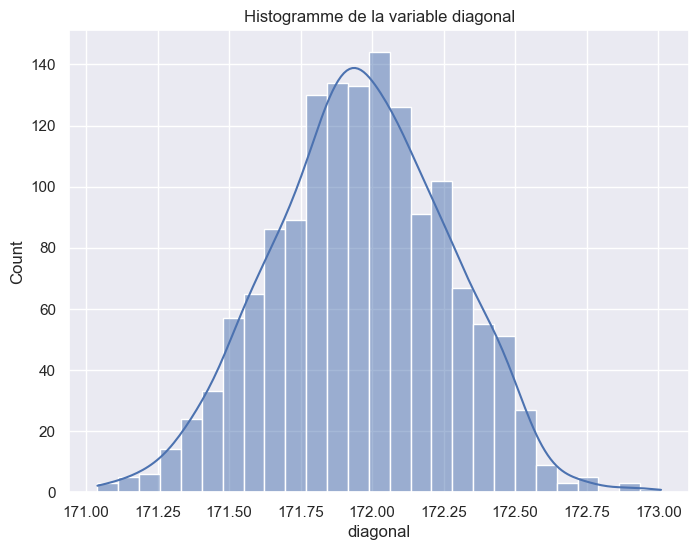

In [45]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='diagonal', kde=True)
plt.title('Histogramme de la variable diagonal')
plt.show()

In [46]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['diagonal'])

NormaltestResult(statistic=1.4344989440997944, pvalue=0.48809292457278597)

P-value > 0.05 : on peut confirmer une distribution normale et rejeter l'hypothèse alternative

In [47]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['diagonal'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


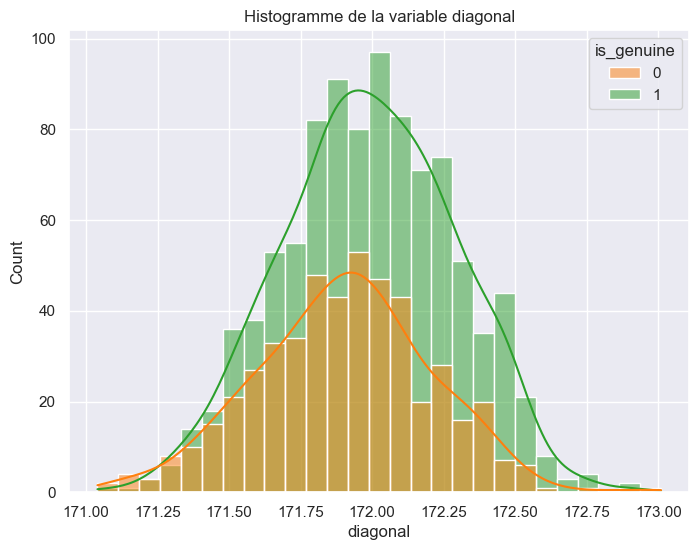

In [48]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='diagonal', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable diagonal')
plt.show()

In [49]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['diagonal'])

NormaltestResult(statistic=4.228707574976643, pvalue=0.12071126948728338)

In [50]:
ad_test = stats.anderson(df_vrais['diagonal'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [51]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['diagonal'])

NormaltestResult(statistic=0.6973530570778484, pvalue=0.705621341724392)

In [52]:
ad_test = stats.anderson(df_faux['diagonal'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

On peut donc confirmer que la variable suit bien une loi normale, dans son ensemble et également par type de billets

In [53]:
# Calcul du skewness et du kurtosis pour mesurer les formes

skewness = stats.skew(df['diagonal'])
kurtosis = stats.kurtosis(df['diagonal'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['diagonal']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.041519904580228244 2.869194519921147 -0.13080548007885318


On note tout de même une légère concentration des valeurs

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.4 - Analyse de la variable height_left  </h3>

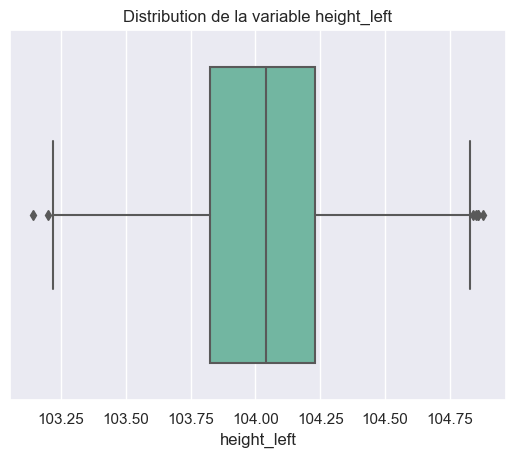

In [54]:
# Analyse de la dispersion 

sns.boxplot(x='height_left', data=df, palette="Set2")
plt.title('Distribution de la variable height_left')
plt.show()

In [55]:
df.height_left.describe()

count    1463.000000
mean      104.031333
std         0.299605
min       103.140000
25%       103.825000
50%       104.040000
75%       104.230000
max       104.880000
Name: height_left, dtype: float64

In [56]:
df.height_left.var()

0.08976340690053686

In [57]:
df.height_left.mode()

0    103.95
Name: height_left, dtype: float64

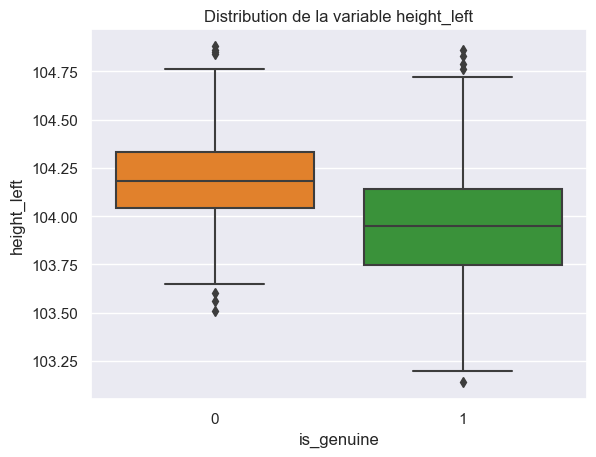

In [58]:
# Visualisation des tendances centrales et de la dispersion 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='height_left', data=df, palette=my_palette)
plt.title('Distribution de la variable height_left')
plt.show()

## Interprétation des résultats

On note une différence un plus marquée cette fois : 

**Pour les vrais billets :**
- une médiane et une moyenne à 103.95
- un mode à 103.95
- Q1 à 103.14
- Q3 à 104.14

**Pour les faux billets :**
- une médiane et une moyenne à 104.18
- un mode à 104.18
- Q1 à 104.04
- Q3 à 104.33

In [59]:
df_vrais.height_left.describe()

count    971.000000
mean     103.951679
std        0.301518
min      103.140000
25%      103.745000
50%      103.950000
75%      104.140000
max      104.860000
Name: height_left, dtype: float64

In [60]:
df_vrais.height_left.mode()

0    103.95
Name: height_left, dtype: float64

In [61]:
df_faux.height_left.describe()

count    492.000000
mean     104.188537
std        0.224418
min      103.510000
25%      104.040000
50%      104.180000
75%      104.330000
max      104.880000
Name: height_left, dtype: float64

In [62]:
df_faux.height_left.mode()

0    104.18
Name: height_left, dtype: float64

In [63]:
# Recherche de valeurs atypiques par type de billet

# Trouver les outliers pour les vrais billets
outliers3 = detect_outliers_iqr(df_vrais, 'height_left')
# Afficher les outliers
print("Outliers détectés:")
outliers3 = pd.DataFrame(outliers3)
outliers3

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
292        True    172.09       103.14        103.81        4.88       3.01   
491        True    172.60       104.83        103.56        4.10       2.94   
905        True    171.99       104.76        104.55        4.39       3.02   
965        True    171.42       104.79        104.16        3.45       3.16   

     length  
0    112.83  
292  113.69  
491  113.38  
905  113.70  
965  112.64

In [64]:
# Trouver les outliers pour les faux billets
outliers4 = detect_outliers_iqr(df_faux, 'height_left')
# Afficher les outliers
print("Outliers détectés:")
outliers4 = pd.DataFrame(outliers4)
outliers4

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1083       False    171.85       103.60        103.82        4.60       3.21   
1085       False    171.39       103.51        103.50        5.52       3.45   
1090       False    172.11       104.88        104.10        4.80       3.73   
1150       False    171.79       104.86        104.34        5.39       3.14   
1168       False    171.83       103.56        103.76        5.56       3.49   
1310       False    171.92       104.84        104.60        5.96       2.92   
1382       False    171.97       104.85        104.52        5.87       3.56   

      length  
1083  112.50  
1085  111.54  
1090  110.78  
1150  113.02  
1168  110.70  
1310  110.69  
1382  110.98

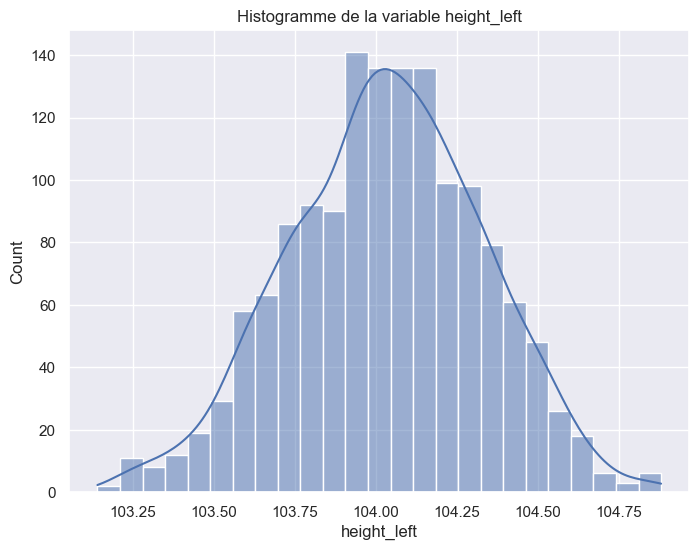

In [65]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='height_left', kde=True)
plt.title('Histogramme de la variable height_left')
plt.show()

In [66]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['height_left'])

NormaltestResult(statistic=4.654132767021689, pvalue=0.09758159457596635)

On rejette l'hypothèse alternative

In [67]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['height_left'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

On a bien une variable distribuée normalement, et on peut rejeter l'hypothèse alternative

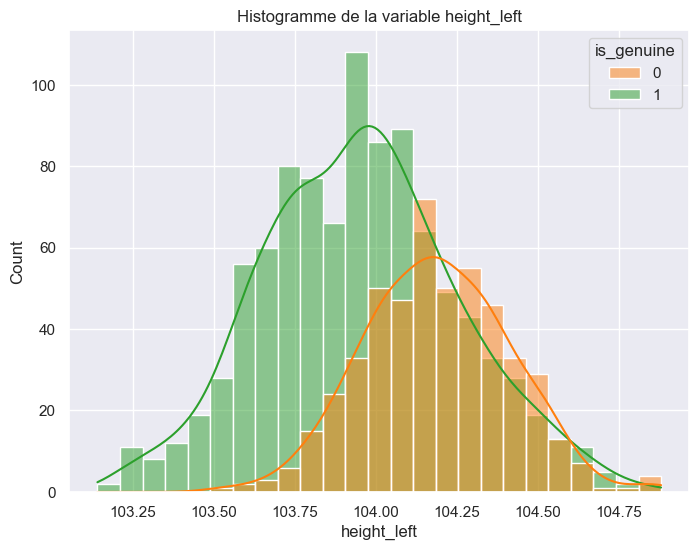

In [68]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='height_left', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable height_left')
plt.show()

In [69]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['height_left'])

NormaltestResult(statistic=4.049087522320057, pvalue=0.1320540776453343)

On rejette à nouveau H1

In [70]:
ad_test = stats.anderson(df_vrais['height_left'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [71]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['height_left'])

NormaltestResult(statistic=0.5382922847097523, pvalue=0.7640315901130867)

Même chose

In [72]:
ad_test = stats.anderson(df_faux['height_left'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

La variable suit toujours une distribution normale, même une fois séparée en catégorie

In [73]:
# Calcul du skewness et du kurtosis pour mesurer les formes

skewness = stats.skew(df['height_left'])
kurtosis = stats.kurtosis(df['height_left'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['height_left']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.09577231175324408 2.8105141353382117 -0.1894858646617883


On note tout de même une distribution légèrement concentrée et étalée sur la gauche

In [74]:
# Mesure de forme pour les vrais billets

skewness = stats.skew(df_vrais['height_left'])
kurtosis = stats.kurtosis(df_vrais['height_left'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_vrais['height_left']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.14343453403156442 2.8617208562529117 -0.13827914374708827


Légèrement étalée sur la droite avec une petite concentration

In [75]:
# Mesure de forme pour les faux billets

skewness = stats.skew(df_faux['height_left'])
kurtosis = stats.kurtosis(df_faux['height_left'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_faux['height_left']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.07467052930509509 3.022411608248069 0.022411608248069204


Distribution plus concentrée et plus centrée 

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.5 - Analyse de la variable height_right  </h3>

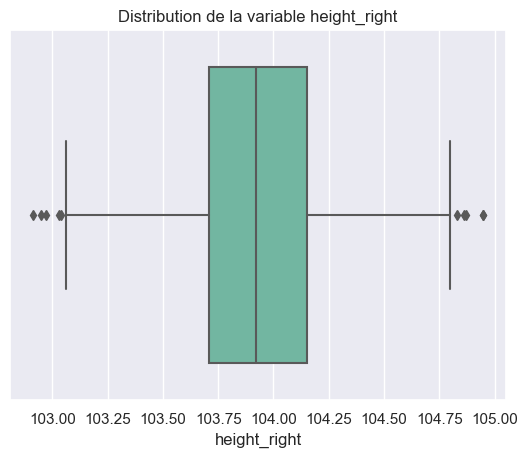

In [76]:
# Analyse de la dispersion 

sns.boxplot(x='height_right', data=df, palette="Set2")
plt.title('Distribution de la variable height_right')
plt.show()

In [77]:
df.height_right.describe()

count    1463.000000
mean      103.921476
std         0.324181
min       102.910000
25%       103.710000
50%       103.920000
75%       104.150000
max       104.950000
Name: height_right, dtype: float64

In [78]:
df.height_right.var()

0.10509344113299024

In [79]:
df.height_right.mode()

0    103.76
Name: height_right, dtype: float64

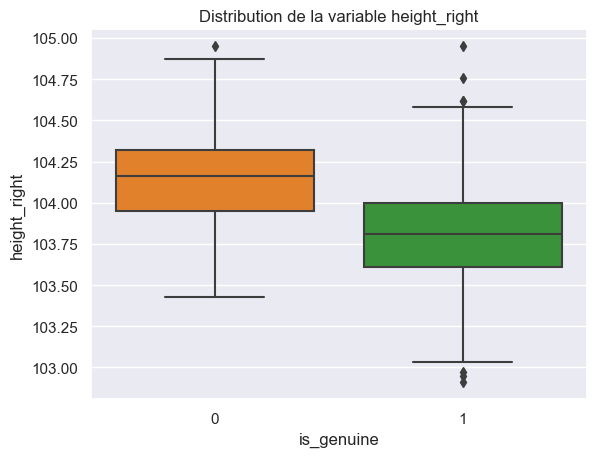

In [80]:
# Visualisation des tendances centrales et de la dispersion 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='height_right', data=df, palette=my_palette)
plt.title('Distribution de la variable height_right')
plt.show()

## Interprétation des résultats

Différences globalement similaires à height_left  : 

**Pour les vrais billets :**
- une médiane et une moyenne à 103.81
- un mode à 103.76
- Q1 à 103.61
- Q3 à 104.00

**Pour les faux billets :**
- une médiane à 104.16
- une moyenne à 104.14
- un mode à 104.31
- Q1 à 103.95
- Q3 à 104.32

In [81]:
df_vrais.height_right.describe()

count    971.000000
mean     103.809094
std        0.288862
min      102.910000
25%      103.610000
50%      103.810000
75%      104.000000
max      104.950000
Name: height_right, dtype: float64

In [82]:
df_vrais.height_right.mode()

0    103.76
Name: height_right, dtype: float64

In [83]:
df_faux.height_right.describe()

count    492.000000
mean     104.143272
std        0.271683
min      103.430000
25%      103.950000
50%      104.160000
75%      104.320000
max      104.950000
Name: height_right, dtype: float64

In [84]:
df_faux.height_right.mode()

0    104.31
Name: height_right, dtype: float64

In [85]:
# Recherche de valeurs atypiques par type de billet

# Trouver les outliers pour les vrais billets
outliers5 = detect_outliers_iqr(df_vrais, 'height_right')
# Afficher les outliers
print("Outliers détectés:")
outliers5 = pd.DataFrame(outliers5)
outliers5

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.81       104.86        104.95        4.52       2.89   
176        True    171.75       103.63        102.97        4.46       2.77   
193        True    172.35       103.73        102.95        4.49       3.37   
522        True    172.02       104.42        102.91        3.86       3.12   
661        True    171.69       104.22        104.62        4.11       3.25   
801        True    172.19       103.84        104.62        4.14       3.21   
921        True    171.36       103.72        104.76        4.17       2.88   

     length  
0    112.83  
176  113.22  
193  112.49  
522  113.43  
661  113.40  
801  113.45  
921  113.14

In [86]:
# Trouver les outliers pour les faux billets
outliers6 = detect_outliers_iqr(df_faux, 'height_right')
# Afficher les outliers
print("Outliers détectés:")
outliers6 = pd.DataFrame(outliers6)
outliers6

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1484       False    172.08       103.96        104.95        5.22       3.45   

      length  
1484  112.07

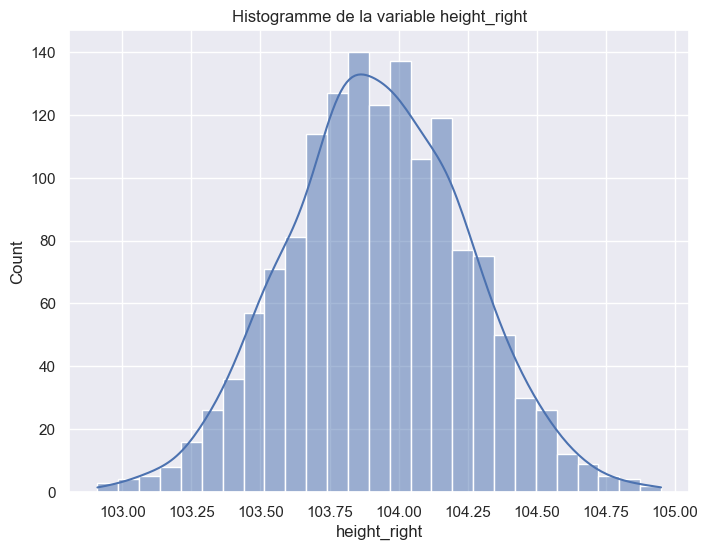

In [87]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='height_right', kde=True)
plt.title('Histogramme de la variable height_right')
plt.show()

In [88]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['height_right'])

NormaltestResult(statistic=0.20350688865018013, pvalue=0.9032522261791562)

On rejette le défaut de normalité

In [89]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['height_right'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


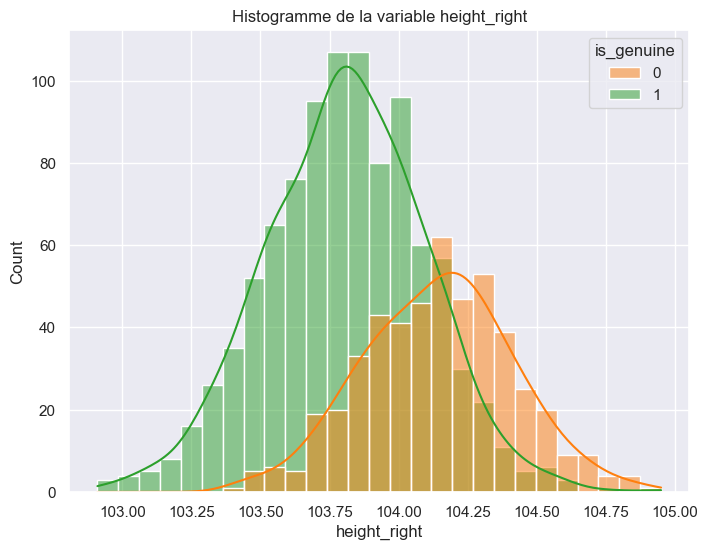

In [90]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='height_right', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable height_right')
plt.show()

In [91]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['height_right'])

NormaltestResult(statistic=1.6387549232618313, pvalue=0.4407059254731307)

On peut rejeter H1

In [92]:
ad_test = stats.anderson(df_vrais['height_right'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [93]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['height_right'])

NormaltestResult(statistic=0.14465784427326434, pvalue=0.9302248739321974)

In [94]:
ad_test = stats.anderson(df_faux['height_right'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

La variable suit toujours une distribution normale, même une fois séparée en catégorie

In [95]:
# Calcul du skewness et du kurtosis pour mesurer les formes

skewness = stats.skew(df['height_right'])
kurtosis = stats.kurtosis(df['height_right'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['height_right']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.013354938092568219 2.939020558007443 -0.06097944199255689


On note tout de même une distribution concentrée

In [96]:
# Mesure de forme pour les vrais billets

skewness = stats.skew(df_vrais['height_right'])
kurtosis = stats.kurtosis(df_vrais['height_right'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_vrais['height_right']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.0027915460794170634 3.1983552422977612 0.19835524229776125


Distribution encore plus concentrée et légèrement étalée à droite

In [97]:
# Mesure de forme pour les faux billets

skewness = stats.skew(df_faux['height_right'])
kurtosis = stats.kurtosis(df_faux['height_right'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_faux['height_right']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.008775812728530015 2.890926674220525 -0.10907332577947493


Distribution encore plus applatie que les précédentes et légèrement étalée à gauche

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.6 - Analyse de la variable margin_low  </h3>

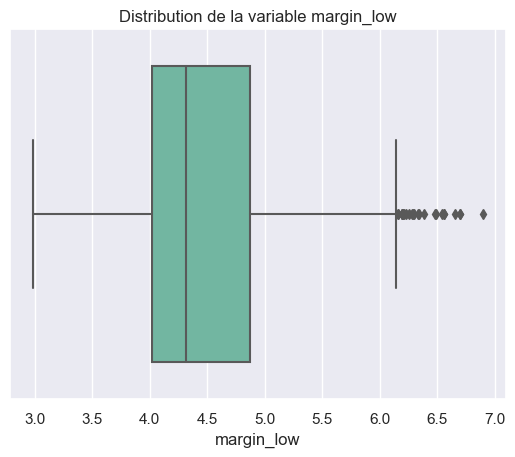

In [98]:
# Analyse de la dispersion 

sns.boxplot(x='margin_low', data=df, palette="Set2")
plt.title('Distribution de la variable margin_low')
plt.show()

In [99]:
df.margin_low.describe()

count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

In [100]:
df.margin_low.var()

0.4406472000172046

In [101]:
df.margin_low.mode()

0    4.08
1    4.10
2    4.18
Name: margin_low, dtype: float64

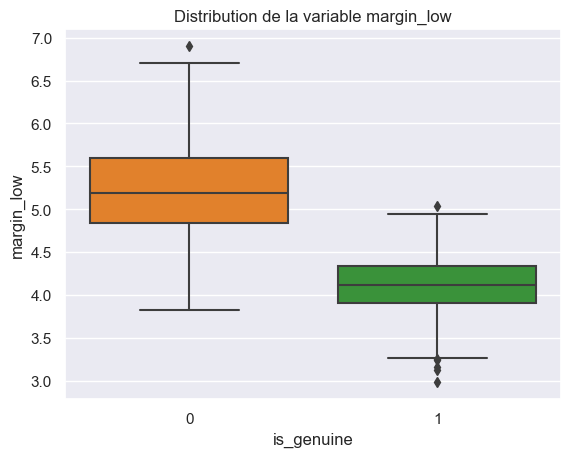

In [102]:
# Visualisation des tendances centrales et de la dispersion 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='margin_low', data=df, palette=my_palette)
plt.title('Distribution de la variable margin_low')
plt.show()

## Interprétation des résultats

Différences très nettes entre les types de billets  : 

**Pour les vrais billets :**
- une médiane et une moyenne à 4.11
- les valeurs les plus fréquentes sont : 4.08 , 4.10 et 4.18 (ex-aequo)
- Q1 à 3.90
- Q3 à 4.34

**Pour les faux billets :**
- une médiane à 5.19
- une moyenne à 5.21
- les valeurs les plus fréquentes sont : 5.14 et 5.28 (ex-aequo)
- Q1 à 4.84
- Q3 à 5.59

La variable margin_low montre 2 groupes bien nets entre les vrais et faux billets, elle nous sera donc très utile pour détecter ces derniers.

In [103]:
df_vrais.margin_low.describe()

count    971.000000
mean       4.116097
std        0.319124
min        2.980000
25%        3.905000
50%        4.110000
75%        4.340000
max        5.040000
Name: margin_low, dtype: float64

In [104]:
df_vrais.margin_low.mode()

0    4.08
1    4.10
2    4.18
Name: margin_low, dtype: float64

In [105]:
df_faux.margin_low.describe()

count    492.000000
mean       5.215935
std        0.553531
min        3.820000
25%        4.840000
50%        5.190000
75%        5.592500
max        6.900000
Name: margin_low, dtype: float64

In [106]:
df_faux.margin_low.mode()

0    5.14
1    5.28
Name: margin_low, dtype: float64

In [107]:
# Recherche de valeurs atypiques par type de billet

# Trouver les outliers pour les vrais billets
outliers7 = detect_outliers_iqr(df_vrais, 'margin_low')
# Afficher les outliers
print("Outliers détectés:")
outliers7 = pd.DataFrame(outliers7)
outliers7

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
10         True    171.83       104.14        103.62        3.16       3.18   
477        True    171.95       104.25        103.64        3.24       2.81   
571        True    171.95       103.76        103.99        3.25       2.78   
664        True    172.05       103.70        103.75        5.04       2.27   
788        True    171.99       103.67        103.76        3.12       2.99   
897        True    172.00       103.65        103.83        2.98       2.76   

     length  
10   113.22  
477  113.42  
571  113.20  
664  113.55  
788  113.22  
897  113.17

In [108]:
# Trouver les outliers pour les faux billets
outliers8 = detect_outliers_iqr(df_faux, 'margin_low')
# Afficher les outliers
print("Outliers détectés:")
outliers8 = pd.DataFrame(outliers8)
outliers8

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1290       False    171.94       104.06        104.22         6.9       3.36   

      length  
1290   111.7

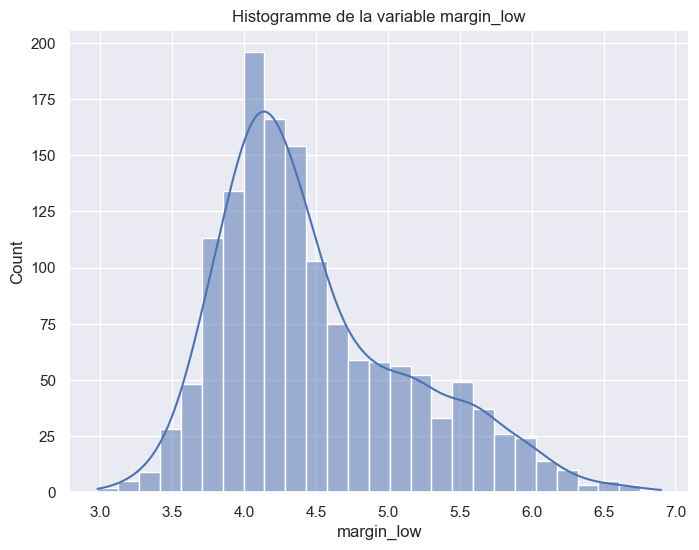

In [109]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='margin_low', kde=True)
plt.title('Histogramme de la variable margin_low')
plt.show()

In [110]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['margin_low'])

NormaltestResult(statistic=142.2784351396471, pvalue=1.2724196359543066e-31)

P-value < 0.05, on rejette H0

In [111]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['margin_low'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Défaut de normalité


**On peut donc confirmer que la variable ne suit pas une distribution normale.**

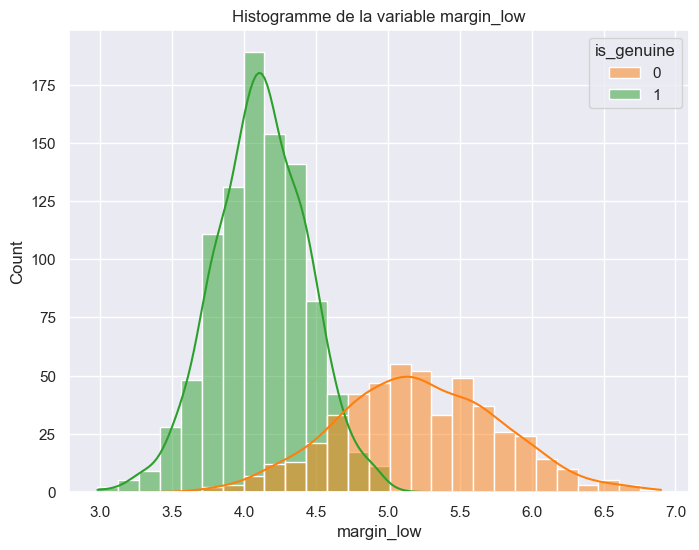

In [112]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='margin_low', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable margin_low')
plt.show()

In [113]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['margin_low'])

NormaltestResult(statistic=1.8220965801248443, pvalue=0.4021024829817955)

Cette fois on rejette le défaut de normalité

In [114]:
ad_test = stats.anderson(df_vrais['margin_low'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [115]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['margin_low'])

NormaltestResult(statistic=1.7049760679312471, pvalue=0.4263528309002601)

In [116]:
ad_test = stats.anderson(df_faux['margin_low'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

La variable dans son ensemble ne suit pas une distribution normale, mais une fois séparée en catégorie les distributions suivent une loi normale

In [117]:
# Calcul du skewness et du kurtosis pour mesurer les formes de la variable

skewness = stats.skew(df['margin_low'])
kurtosis = stats.kurtosis(df['margin_low'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['margin_low']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.862180372209301 3.2190228173929074 0.2190228173929074


Distribution concentrée, étalée sur la droite

In [118]:
# Calcul du skewness et du kurtosis pour mesurer les formes des vrais billets

skewness = stats.skew(df_vrais['margin_low'])
kurtosis = stats.kurtosis(df_vrais['margin_low'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_vrais['margin_low']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.10068008033998627 3.0461886497192157 0.04618864971921566


Distribution concentrée, légèrement étalée sur la gauche

In [119]:
# Calcul du skewness et du kurtosis pour mesurer les formes des faux billets

skewness = stats.skew(df_faux['margin_low'])
kurtosis = stats.kurtosis(df_faux['margin_low'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_faux['margin_low']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.11632582604965509 2.819243060530115 -0.18075693946988514


Distribution moins concentrée, légèrement étalée sur la droite

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.7 - Analyse de la variable margin_up  </h3>

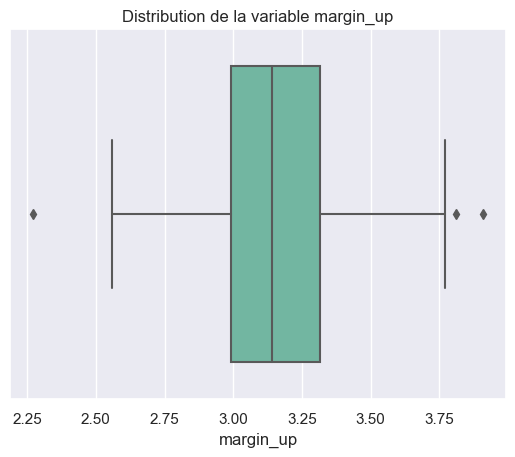

In [120]:
# Analyse de la dispersion 

sns.boxplot(x='margin_up', data=df, palette="Set2")
plt.title('Distribution de la variable margin_up')
plt.show()

In [121]:
df.margin_up.describe()

count    1463.000000
mean        3.153083
std         0.231466
min         2.270000
25%         2.990000
50%         3.140000
75%         3.315000
max         3.910000
Name: margin_up, dtype: float64

In [122]:
df.margin_up.var()

0.05357646853110892

In [123]:
df.margin_up.mode()

0    3.08
Name: margin_up, dtype: float64

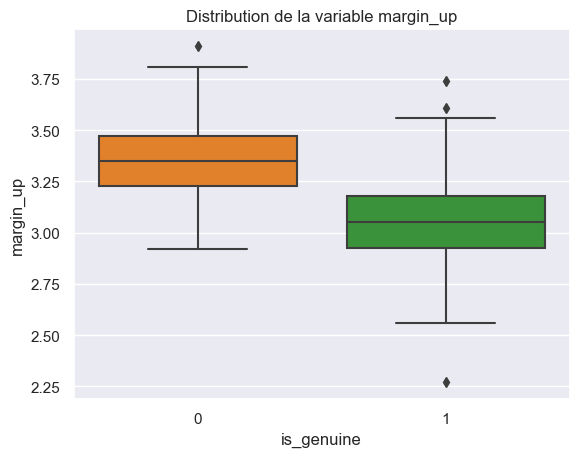

In [124]:
# Visualisation des tendances centrales et de la dispersion 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='margin_up', data=df, palette=my_palette)
plt.title('Distribution de la variable margin_up')
plt.show()

## Interprétation des résultats

Différences entre les types de billets  : 

**Pour les vrais billets :**
- une médiane et une moyenne à 3.05
- le mode est de 3.08
- Q1 à 2.92
- Q3 à 3.18

**Pour les faux billets :**
- une médiane et une moyenne à 3.35
- le mode est de 3.31
- Q1 à 3.22
- Q3 à 3.47

In [125]:
df_vrais.margin_up.describe()

count    971.000000
mean       3.052544
std        0.185425
min        2.270000
25%        2.925000
50%        3.050000
75%        3.180000
max        3.740000
Name: margin_up, dtype: float64

In [126]:
df_vrais.margin_up.mode()

0    3.08
Name: margin_up, dtype: float64

In [127]:
df_faux.margin_up.describe()

count    492.000000
mean       3.351504
std        0.179343
min        2.920000
25%        3.227500
50%        3.350000
75%        3.472500
max        3.910000
Name: margin_up, dtype: float64

In [128]:
df_faux.margin_up.mode()

0    3.31
Name: margin_up, dtype: float64

In [129]:
# Recherche de valeurs atypiques par type de billet

# Trouver les outliers pour les vrais billets
outliers9 = detect_outliers_iqr(df_vrais, 'margin_up')
# Afficher les outliers
print("Outliers détectés:")
outliers9 = pd.DataFrame(outliers9)
outliers9

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
48         True    172.07       104.05        103.82        3.71       3.61   
52         True    171.64       104.18        103.78        3.49       3.74   
664        True    172.05       103.70        103.75        5.04       2.27   

     length  
48   113.05  
52   113.94  
664  113.55

In [130]:
# Trouver les outliers pour les faux billets
outliers10 = detect_outliers_iqr(df_faux, 'margin_up')
# Afficher les outliers
print("Outliers détectés:")
outliers10 = pd.DataFrame(outliers10)
outliers10

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1029       False    171.96       104.29        104.03        6.01       3.91   

      length  
1029  110.83

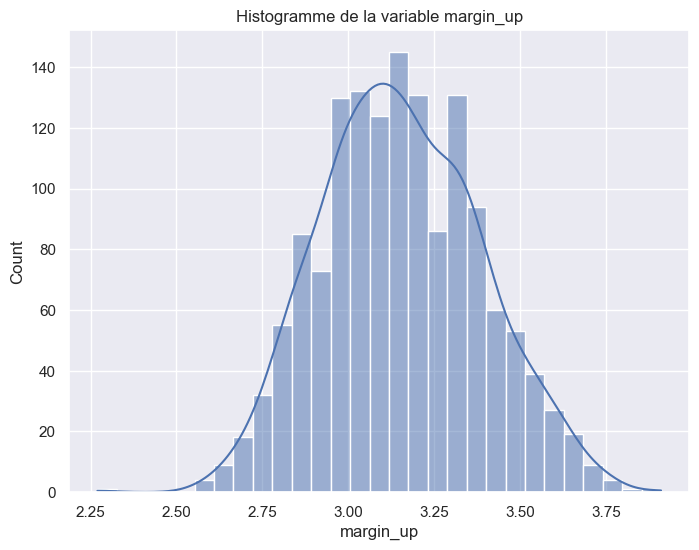

In [131]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='margin_up', kde=True)
plt.title('Histogramme de la variable margin_up')
plt.show()

In [132]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['margin_up'])

NormaltestResult(statistic=11.112405864733141, pvalue=0.003863418242343748)

Une distribution qui s'approche de la loi normale mais pas assez, hypothèse rejetée

In [133]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['margin_up'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Défaut de normalité


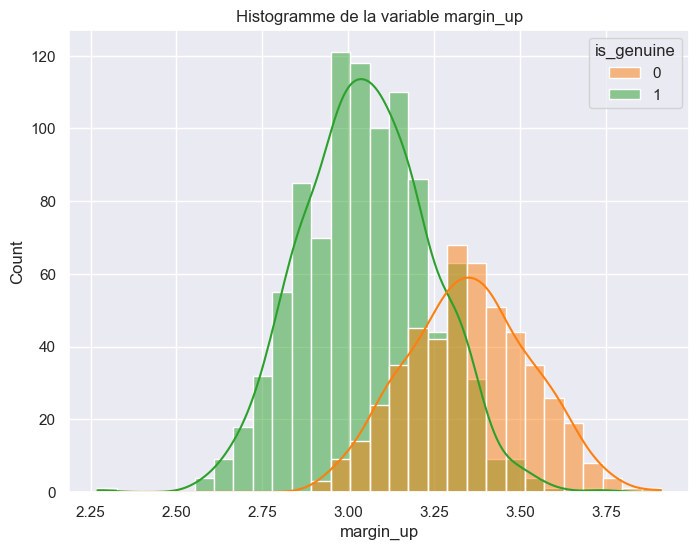

In [134]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='margin_up', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable margin_up')
plt.show()

In [135]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['margin_up'])

NormaltestResult(statistic=0.6570213501328216, pvalue=0.7199952421877703)

H1 rejetée, on a cette fois une distribution normale

In [136]:
ad_test = stats.anderson(df_vrais['margin_up'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [137]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['margin_up'])

NormaltestResult(statistic=4.862306525921628, pvalue=0.08793536148684244)

Idem

In [138]:
ad_test = stats.anderson(df_faux['margin_up'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

La variable dans son ensemble ne suit pas une distribution normale, mais une fois séparée en catégorie les distributions suivent une loi normale

In [139]:
# Calcul du skewness et du kurtosis pour mesurer les formes de la variable

skewness = stats.skew(df['margin_up'])
kurtosis = stats.kurtosis(df['margin_up'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['margin_up']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.14881598644768607 2.7272949212484483 -0.2727050787515517


Distribution légèrement étalée à droite et concentrée

In [140]:
# Calcul du skewness et du kurtosis pour mesurer les formes des vrais billets

skewness = stats.skew(df_vrais['margin_up'])
kurtosis = stats.kurtosis(df_vrais['margin_up'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_vrais['margin_up']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.0527139862998885 3.0531039137690246 0.05310391376902457


Distribution plus centrée et plus concentrée

In [141]:
# Calcul du skewness et du kurtosis pour mesurer les formes des faux billets

skewness = stats.skew(df_faux['margin_up'])
kurtosis = stats.kurtosis(df_faux['margin_up'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_faux['margin_up']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.061171974656058496 2.601426451209107 -0.398573548790893


Distribution plus applatie et plutôt centrée

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">2.6 - Analyse de la variable length </h3>

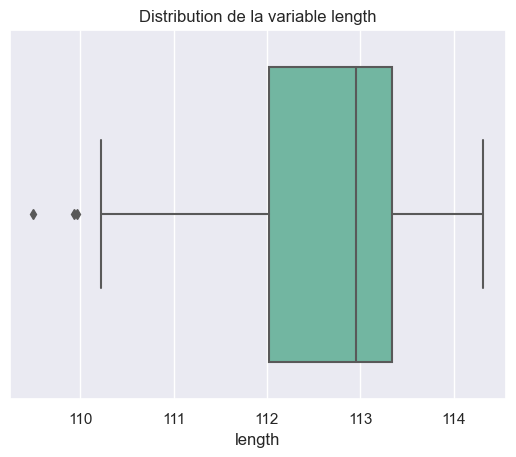

In [142]:
# Analyse de la dispersion 

sns.boxplot(x='length', data=df, palette="Set2")
plt.title('Distribution de la variable length')
plt.show()

In [143]:
df.length.describe()

count    1463.000000
mean      112.674757
std         0.873222
min       109.490000
25%       112.020000
50%       112.960000
75%       113.340000
max       114.320000
Name: length, dtype: float64

In [144]:
df.length.var()

0.7625160662506909

In [145]:
df.length.mode()

0    113.38
Name: length, dtype: float64

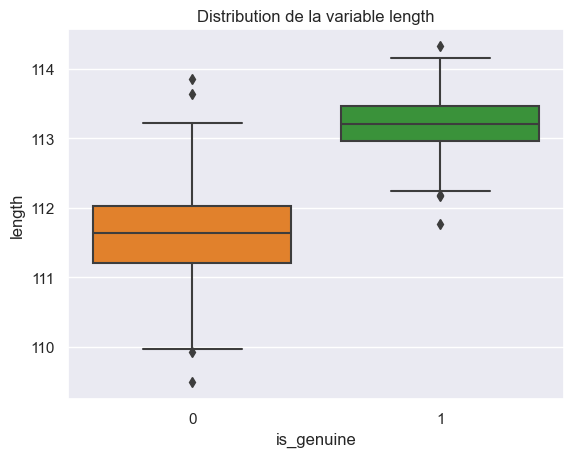

In [146]:
# Visualisation des tendances centrales et de la dispersion 
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(x='is_genuine',y='length', data=df, palette=my_palette)
plt.title('Distribution de la variable length')
plt.show()

## Interprétation des résultats

Différences très nettes entre les types de billets  : 

**Pour les vrais billets :**
- une médiane et une moyenne à 113.20
- Q1 à 112.96
- Q3 à 113.46
- un mode à 113.38

**Pour les faux billets :**
- une médiane et une moyenne à 111.63
- Q1 à 111.20
- Q3 à 112.03
- un mode à 111.04

La variable length montre 2 groupes bien nets entre les vrais et faux billets, elle nous sera donc très utile pour détecter ces derniers.

In [147]:
df_vrais.length.describe()

count    971.000000
mean     113.203059
std        0.356123
min      111.760000
25%      112.960000
50%      113.200000
75%      113.460000
max      114.320000
Name: length, dtype: float64

In [148]:
df_vrais.length.mode()

0    113.38
Name: length, dtype: float64

In [149]:
df_faux.length.describe()

count    492.000000
mean     111.632114
std        0.615343
min      109.490000
25%      111.200000
50%      111.630000
75%      112.030000
max      113.850000
Name: length, dtype: float64

In [150]:
df_faux.length.mode()

0    111.04
Name: length, dtype: float64

In [151]:
# Recherche de valeurs atypiques par type de billet

# Trouver les outliers pour les vrais billets
outliers11 = detect_outliers_iqr(df_vrais, 'length')
# Afficher les outliers
print("Outliers détectés:")
outliers11 = pd.DataFrame(outliers11)
outliers11

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
591        True    171.67       103.81        103.76        4.59       3.30   
728        True    171.94       104.11        104.16        4.08       3.35   
951        True    171.95       103.86        103.80        4.51       2.87   
974        True    172.06       104.08        103.47        4.47       2.97   

     length  
591  112.18  
728  111.76  
951  112.17  
974  114.32

In [152]:
# Trouver les outliers pour les faux billets
outliers12 = detect_outliers_iqr(df_faux, 'length')
# Afficher les outliers
print("Outliers détectés:")
outliers12 = pd.DataFrame(outliers12)
outliers12

Outliers détectés:


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1082       False    171.75       103.96        103.83        5.39       3.54   
1122       False    172.09       104.15        104.17        4.15       3.40   
1325       False    171.83       104.39        104.17        5.51       3.33   
1453       False    171.55       104.20        104.49        5.42       3.54   

      length  
1082  109.49  
1122  113.85  
1325  113.64  
1453  109.93

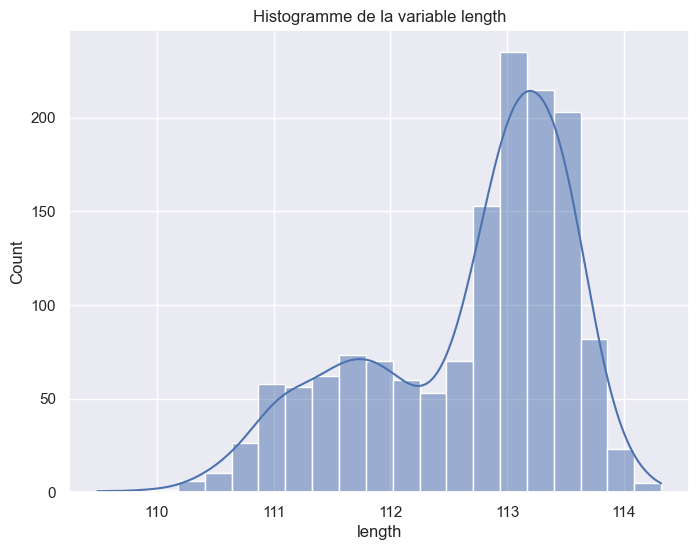

In [153]:
# Analyse graphique de la normalité 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='length', kde=True)
plt.title('Histogramme de la variable length')
plt.show()

In [154]:
# Test de normalité (D'Agostino-Pearson car 1500 individus)

# H0 = normalité de la distribution
# H1 = défaut de normalité

stats.normaltest(df['length'])

NormaltestResult(statistic=134.7088724584068, pvalue=5.6019601350777044e-30)

H0 rejeté, tout comme avec l'analyse visuelle

In [155]:
# On confirme avec le test d'Anderson-Darling 

ad_test = stats.anderson(df['length'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Défaut de normalité


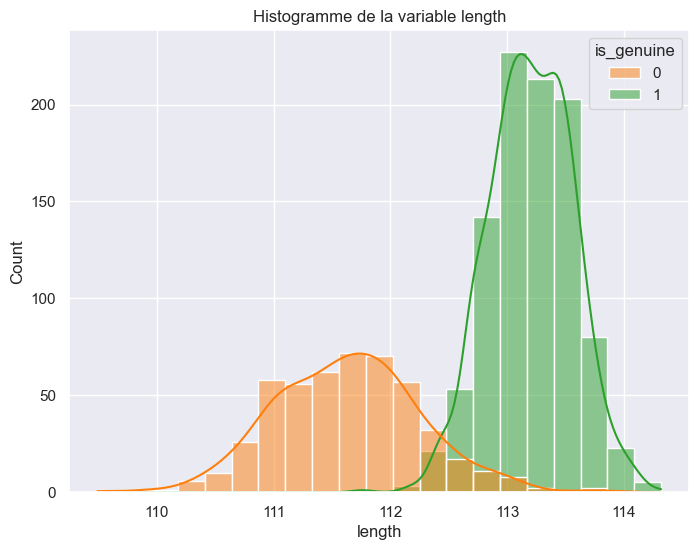

In [156]:
# Analyse graphique de la normalité par type

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='length', kde=True, hue='is_genuine', palette=my_palette)
plt.title('Histogramme de la variable length')
plt.show()

In [157]:
# Tests de normalité  pour les vrais billets

stats.normaltest(df_vrais['length'])

NormaltestResult(statistic=1.2486467314556267, pvalue=0.5356237273041704)

Distribution normale confirmée

In [158]:
ad_test = stats.anderson(df_vrais['length'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


In [159]:
# Tests de normalité  pour les faux billets

stats.normaltest(df_faux['length'])

NormaltestResult(statistic=2.9611432190782874, pvalue=0.22750760569145975)

Même chose

In [160]:
ad_test = stats.anderson(df_faux['length'], dist ='norm')

print('Distribution normale' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) 
      else 'Défaut de normalité')

Distribution normale


## Interprétation des résultats

La variable dans son ensemble ne suit pas une distribution normale, mais une fois séparée en catégorie les distributions suivent une loi normale

In [161]:
# Calcul du skewness et du kurtosis pour mesurer les formes de la variable

skewness = stats.skew(df['length'])
kurtosis = stats.kurtosis(df['length'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df['length']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.812553255892717 2.690925218987323 -0.30907478101267705


Distribution très étalée sur la gauche

In [162]:
# Calcul du skewness et du kurtosis pour mesurer les formes des vrais billets

skewness = stats.skew(df_vrais['length'])
kurtosis = stats.kurtosis(df_vrais['length'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_vrais['length']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

-0.08374276750644034 2.934847322861719 -0.06515267713828088


Distribution plus concentrée, légèrement étirée sur la gauche

In [163]:
# Calcul du skewness et du kurtosis pour mesurer les formes des faux billets

skewness = stats.skew(df_faux['length'])
kurtosis = stats.kurtosis(df_faux['length'],fisher=False) # Vrai kurtosis
excess_kurtosis = stats.kurtosis(df_faux['length']) # Vrai kurtosis

print(skewness, kurtosis, excess_kurtosis)

0.12243448291832593 3.280625039148679 0.2806250391486791


Distribution plus concentrée et légèrement étalée à droite

## Résultats de l'analyse univariée : 


- Sur les 6 variables quantitatives, seulement 3 ont une distribution normale dans leur ensemble : diagonal, height_left et height_right
- Une fois divisées en catégorie, elles suivent toutes une loi normale
- Quelques valeurs atypiques ont été détectées, je décide de les conserver pour le moment et de juger leur impact sur l'algorithme final par la suite 
- Les variables montrant le plus de différences entre les faux billets sont margin_low et length
- Récupérer les valeurs manquantes sur margin_low pourrait améliorer l'apprentissage et les performances de la détection des faux-billets 

Nous allons maintenant étudier les relations entre nos variables.

Puisque nous voulons prédire la variable is_genuine, nous allons particulièrement étudier les associations entre celle-ci et les autres variables.

In [164]:
# Enregistrement des outliers potentiels dans un df 

df_outliers = pd.concat([outliers1, outliers2, outliers3, outliers4, outliers5, outliers6,
                        outliers7, outliers8, outliers9, outliers10, outliers11, outliers12], ignore_index=False)
df_outliers

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
636         True    171.13       104.28        103.14        4.16       2.92   
729         True    171.04       103.84        103.64        4.22       3.36   
828         True    172.92       103.55        103.94        4.78       3.27   
842         True    172.89       103.77        104.24        4.12       3.01   
1022       False    172.89       104.03        104.03        6.03       3.00   
1142       False    171.04       104.23        104.22        4.87       3.56   
1277       False    173.01       104.59        104.31        5.04       3.05   
1388       False    171.05       104.09        104.50        4.72       3.10   
1450       False    172.72       104.05        104.17        4.21       3.37   
0           True    171.81       104.86        104.95        4.52       2.89   
292         True    172.09       103.14        103.81        4.88       3.01   
491         True    172.60       104.83        103.56        4.10       2.94   
905         True    171.99       104.76        104.55        4.39       3.02   
965         True    171.42       104.79        104.16        3.45       3.16   
1083       False    171.85       103.60        103.82        4.60       3.21   
1085       False    171.39       103.51        103.50        5.52       3.45   
1090       False    172.11       104.88        104.10        4.80       3.73   
1150       False    171.79       104.86        104.34        5.39       3.14   
1168       False    171.83       103.56        103.76        5.56       3.49   
1310       False    171.92       104.84        104.60        5.96       2.92   
1382       False    171.97       104.85        104.52        5.87       3.56   
0           True    171.81       104.86        104.95        4.52       2.89   
176         True    171.75       103.63        102.97        4.46       2.77   
193         True    172.35       103.73        102.95        4.49       3.37   
522         True    172.02       104.42        102.91        3.86       3.12   
661         True    171.69       104.22        104.62        4.11       3.25   
801         True    172.19       103.84        104.62        4.14       3.21   
921         True    171.36       103.72        104.76        4.17       2.88   
1484       False    172.08       103.96        104.95        5.22       3.45   
10          True    171.83       104.14        103.62        3.16       3.18   
477         True    171.95       104.25        103.64        3.24       2.81   
571         True    171.95       103.76        103.99        3.25       2.78   
664         True    172.05       103.70        103.75        5.04       2.27   
788         True    171.99       103.67        103.76        3.12       2.99   
897         True    172.00       103.65        103.83        2.98       2.76   
1290       False    171.94       104.06        104.22        6.90       3.36   
48          True    172.07       104.05        103.82        3.71       3.61   
52          True    171.64       104.18        103.78        3.49       3.74   
664         True    172.05       103.70        103.75        5.04       2.27   
1029       False    171.96       104.29        104.03        6.01       3.91   
591         True    171.67       103.81        103.76        4.59       3.30   
728         True    171.94       104.11        104.16        4.08       3.35   
951         True    171.95       103.86        103.80        4.51       2.87   
974         True    172.06       104.08        103.47        4.47       2.97   
1082       False    171.75       103.96        103.83        5.39       3.54   
1122       False    172.09       104.15        104.17        4.15       3.40   
1325       False    171.83       104.39        104.17        5.51       3.33   
1453       False    171.55       104.20        104.49        5.42       3.54   

      length  
636   113.00  
729   112.70  
828   113.55  
842   113.72  
1022  110.

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyses multivariées </h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.1 - Recherche de liens : premières analyses visuelles </h3>

In [165]:
# Importation des librairies supplémentaires

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, levene, wilcoxon

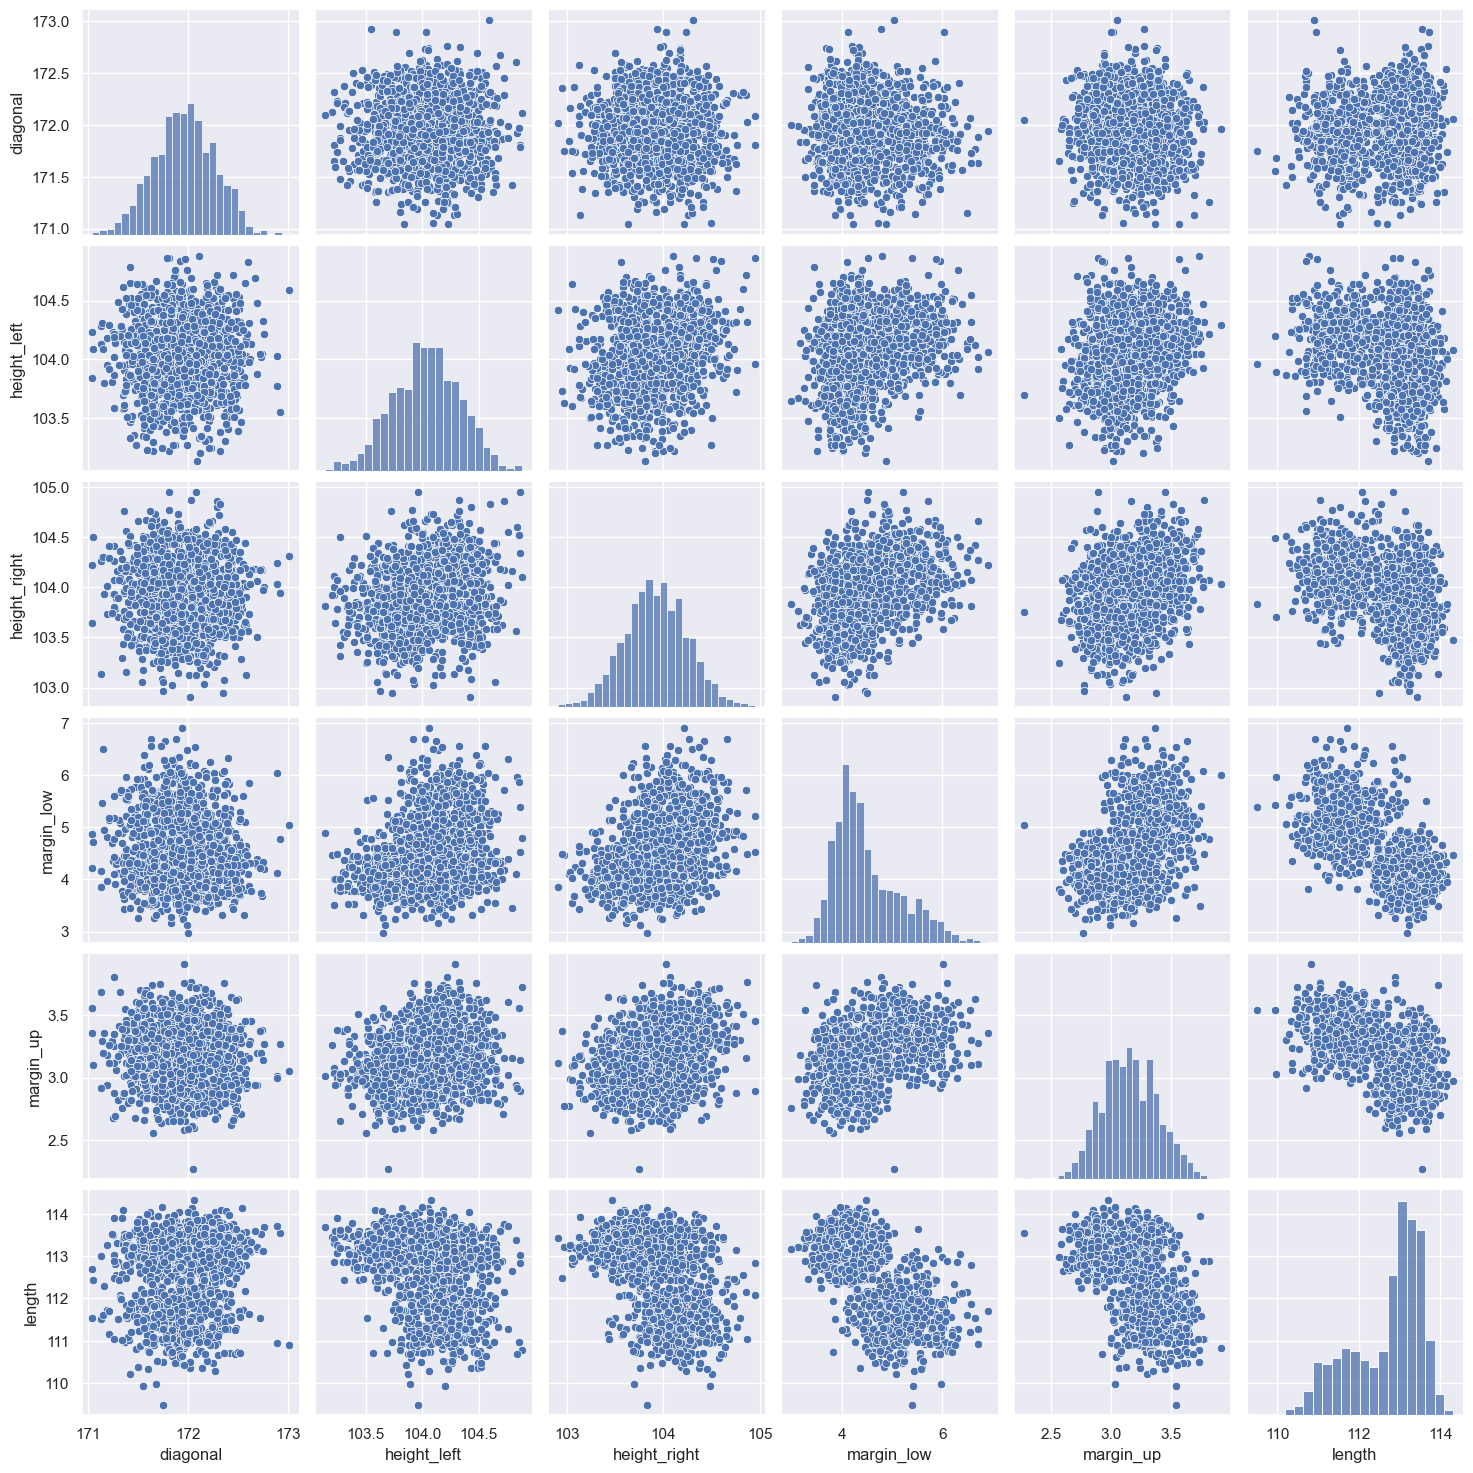

In [166]:
# Analyse visuelle des corrélations entre les variables quantitatives

# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include=['float64'])

sns.pairplot(quant_vars)

<Axes: >

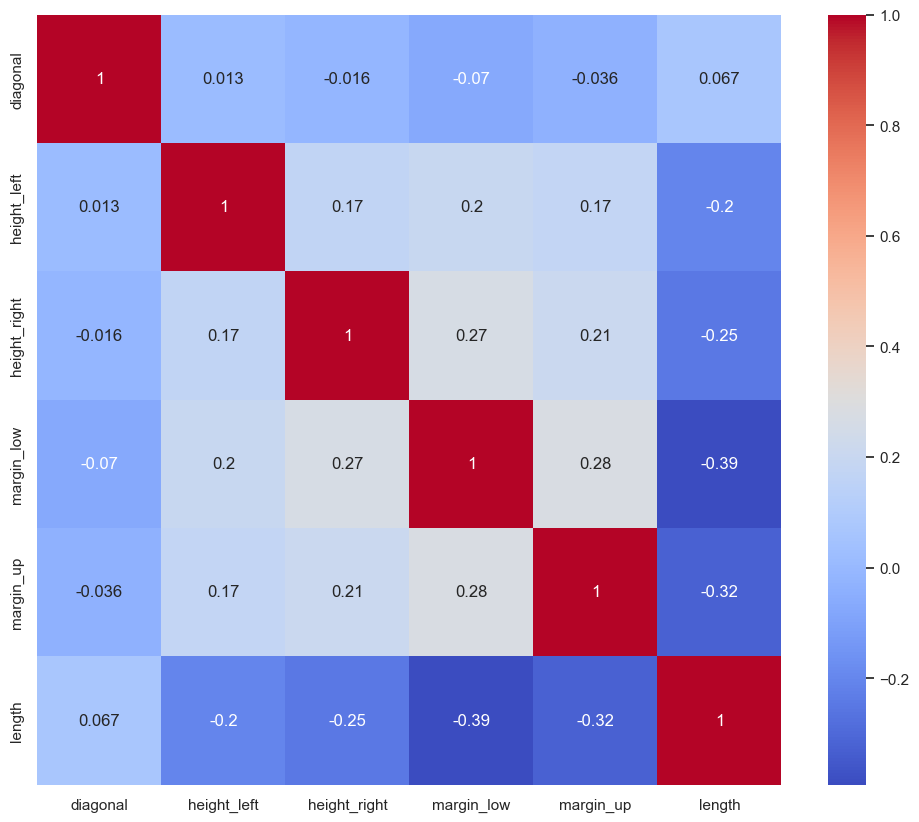

In [167]:
# Calcul de la matrice de corrélation (Kendall car non paramétrique)
corr_matrix = quant_vars.corr(method='kendall')


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

**Corrélations potentielles à étudier :**

- length et height_right
- margin_low et length 
- margin_low et height_left
- margin_up et length
- margin_up et margin_low

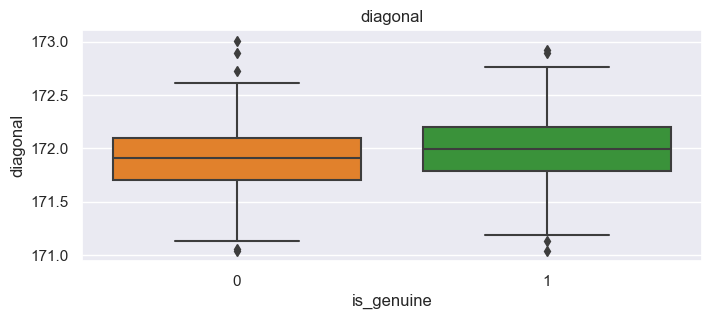

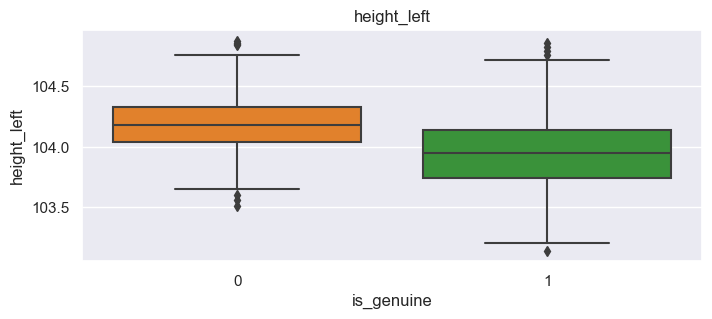

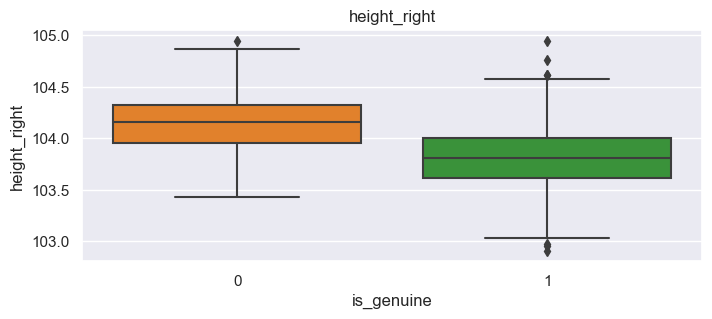

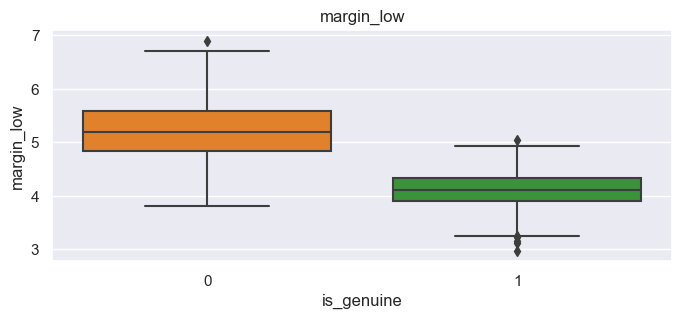

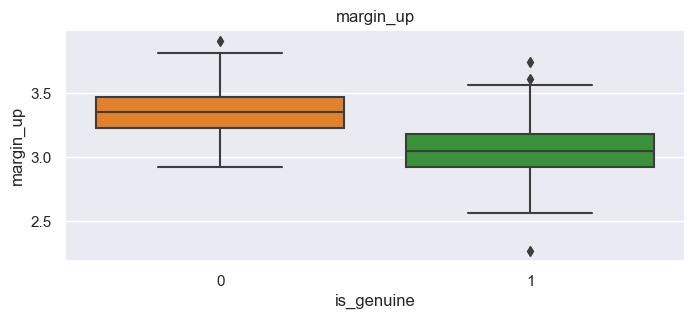

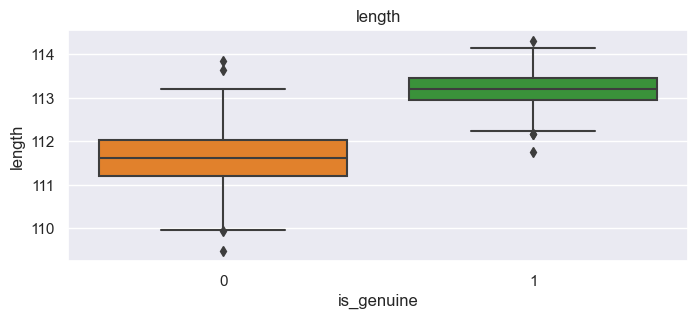

In [168]:
# Analyse visuelle des associations possibles 

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

for var in quant_vars:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(y=var, x='is_genuine', data=df, ax=ax, palette=my_palette)
    plt.title(var)
    plt.show()

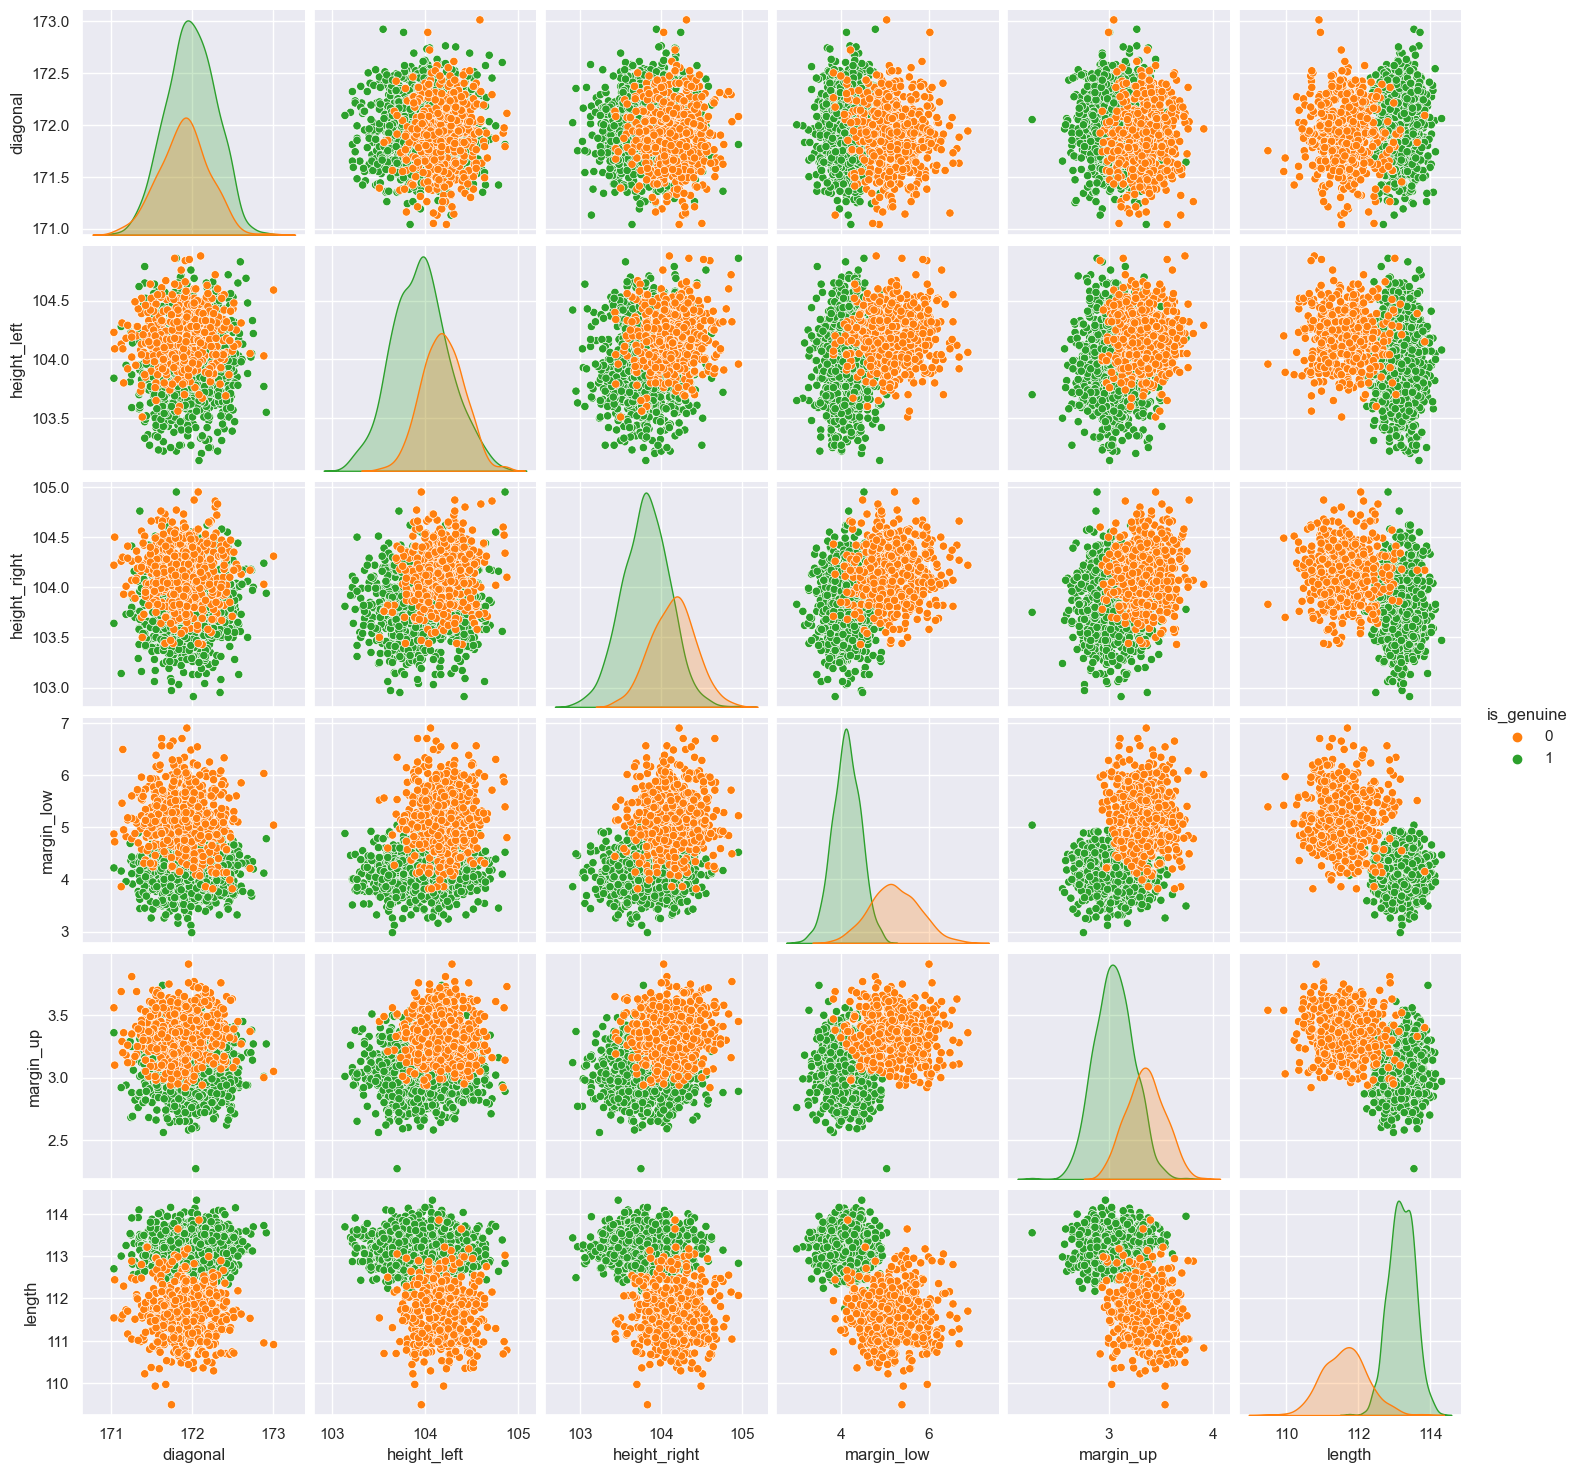

In [169]:
# Analyse visuelle des paires de variables par type
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.pairplot(data=df, hue='is_genuine', palette=my_palette)

**Associations potentielles à étudier :**

- is_genuine et margin_low
- is_genuine et length
- (is_genuine et height_right)
- (is_genuine et height_left)

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.2 - Etude du lien entre margin_low et length </h3>

In [170]:
# Récupération des données

df_corr1 = df[['margin_low','length']]
df_corr1.describe()

margin_low       length
count  1463.000000  1463.000000
mean      4.485967   112.674757
std       0.663813     0.873222
min       2.980000   109.490000
25%       4.015000   112.020000
50%       4.310000   112.960000
75%       4.870000   113.340000
max       6.900000   114.320000

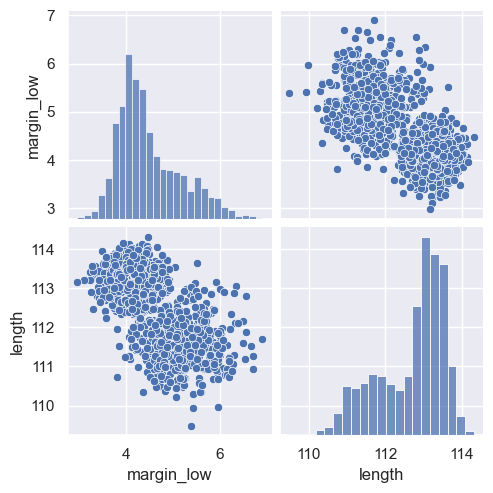

In [171]:
# Analyse graphique

sns.pairplot(df_corr1, kind="scatter")

### Interprétation des résultats :

Comme nous l'avons vérifié plus tôt, nos deux variables ne suivent pas une distribution normale. 
On remarque une "coupure" au sein de nos nuages de points, potentiellement causé par les valeurs manquantes.
Les variables ont l'air corrélées négativement, nous allons le vérifier avec un test de Spearman.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [172]:
# Calcul de la corrélation de spearman

spearmanr(df_corr1['margin_low'], df_corr1['length'])

SignificanceResult(statistic=-0.5875063766668387, pvalue=1.7175799309767639e-136)

### Interprétation des résultats :

Le coefficient de Spearman indique une corrélation plutôt forte, négative et monotone entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle. 


**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [173]:
# Calcul de la corrélation de kendall

kendalltau(df_corr1['margin_low'], df_corr1['length'])

SignificanceResult(statistic=-0.39241210042370084, pvalue=5.755170482906464e-111)

### Interprétation des résultats :

Il y a bien une corrélation entre margin_low et length, monotone, négative et d'intensité moyenne. On peut rejeter à nouveau H0.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.3 - Etude du lien entre margin_low et height_right </h3>

In [174]:
# Récupération des données

df_corr2 = df[['margin_low','height_right']]
df_corr2.describe()

margin_low  height_right
count  1463.000000   1463.000000
mean      4.485967    103.921476
std       0.663813      0.324181
min       2.980000    102.910000
25%       4.015000    103.710000
50%       4.310000    103.920000
75%       4.870000    104.150000
max       6.900000    104.950000

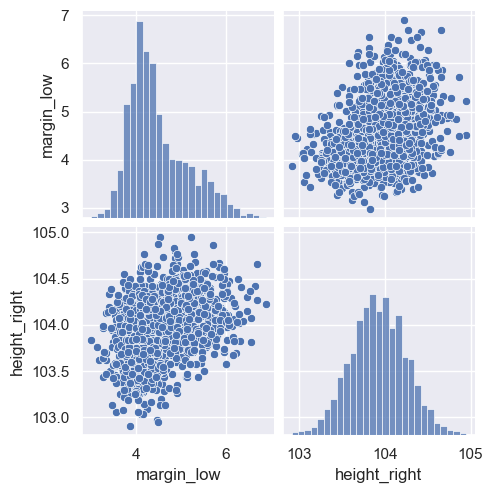

In [175]:
# Analyse graphique

sns.pairplot(df_corr2, kind="scatter")

### Interprétation des résultats :

Comme nous l'avons vérifié plus tôt, seul height_right suit une distribution normale.

Les variables ont l'air corrélées positivement cette dois, nous allons le vérifier avec un test de Spearman.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [176]:
# Calcul de la corrélation de spearman

spearmanr(df_corr2['margin_low'], df_corr2['height_right'])

SignificanceResult(statistic=0.3966513967555929, pvalue=2.579326407237471e-56)

### Interprétation des résultats :

Le coefficient de Spearman indique une corrélation monotone et d'intensité moyenne entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle.

**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [177]:
# Calcul de la corrélation de kendall

kendalltau(df_corr2['margin_low'], df_corr2['height_right'])

SignificanceResult(statistic=0.2680086016015709, pvalue=1.5549445388758032e-52)

### Interprétation des résultats :

Il y a bien une corrélation entre margin_low et height_right, monotone,  d'intensité plutôt moyenne. On peut rejeter à nouveau H0.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.4 - Etude du lien entre margin_low et height_left </h3>

In [178]:
# Récupération des données

df_corr3 = df[['margin_low','height_left']]
df_corr3.describe()

margin_low  height_left
count  1463.000000  1463.000000
mean      4.485967   104.031333
std       0.663813     0.299605
min       2.980000   103.140000
25%       4.015000   103.825000
50%       4.310000   104.040000
75%       4.870000   104.230000
max       6.900000   104.880000

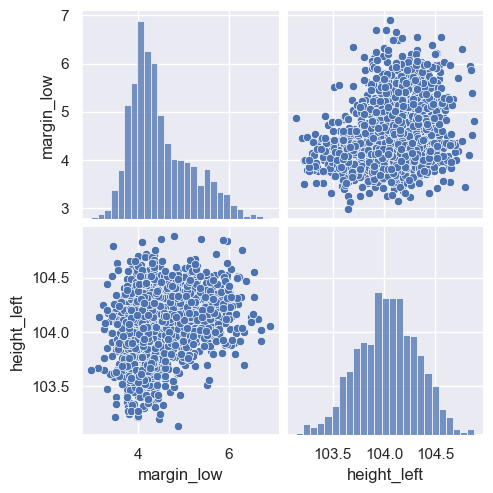

In [179]:
# Analyse graphique

sns.pairplot(df_corr3, kind="scatter")

### Interprétation des résultats :

Une seule variable suit une distribution normale, il nous faudra donc à nouveau des tests non paramétriques.
Analyse graphique assez peu concluante, il est difficile de dire s'il y a effectivement corrélation ou non avec les outliers potentiels.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [180]:
# Calcul de la corrélation de spearman

spearmanr(df_corr3['margin_low'], df_corr3['height_left'])

SignificanceResult(statistic=0.29740079243675405, pvalue=2.909421256081817e-31)

### Interprétation des résultats :

Le coefficient de Spearman indique une corrélation plutôt moyenne, négative et monotone entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle. 

**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [181]:
# Calcul de la corrélation de kendall

kendalltau(df_corr3['margin_low'], df_corr3['height_left'])

SignificanceResult(statistic=0.19975887148547464, pvalue=6.2498760189580655e-30)

### Interprétation des résultats :

On peut raisonnablement confirmer qu'il y a corrélation entre ces deux variables, négative et plutôt moyenne.
On peut rejeter à nouveau H0.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.5 - Etude du lien entre margin_up et length </h3>

In [182]:
# Récupération des données

df_corr4 = df[['margin_up','length']]
df_corr4.describe()

margin_up       length
count  1463.000000  1463.000000
mean      3.153083   112.674757
std       0.231466     0.873222
min       2.270000   109.490000
25%       2.990000   112.020000
50%       3.140000   112.960000
75%       3.315000   113.340000
max       3.910000   114.320000

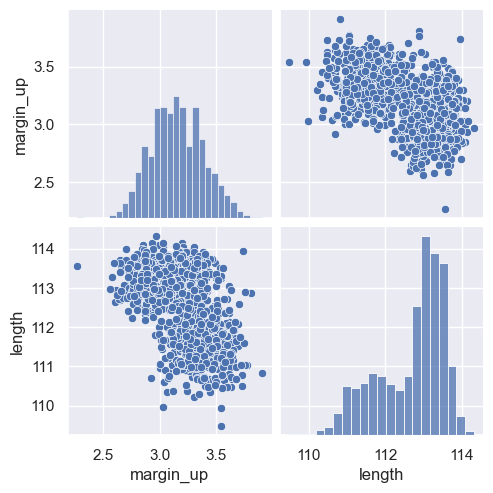

In [183]:
# Analyse graphique

sns.pairplot(df_corr4, kind="scatter")

### Interprétation des résultats :

Comme nous l'avons vu précédemment, length ne suit pas une distribution normale. 
Les variables ont l'air corrélées négativement, nous allons le vérifier avec un test de Spearman.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [184]:
# Calcul de la corrélation de spearman

spearmanr(df_corr4['margin_up'], df_corr4['length'])

SignificanceResult(statistic=-0.4794554684929373, pvalue=5.88473728487953e-85)

### Interprétation des résultats :

On a donc une corrélation assez forte, négative et monotone entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle. 


**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [185]:
# Calcul de la corrélation de kendall

kendalltau(df_corr4['margin_up'], df_corr4['length'])

SignificanceResult(statistic=-0.3234589698348363, pvalue=1.611748077103546e-75)

### Interprétation des résultats :

Il y a bien une corrélation entre margin_up et length, monotone, négative et d'intensité moyenne. On peut rejeter à nouveau H0.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.6 - Etude du lien entre margin_up et margin_low </h3>

In [186]:
# Récupération des données

df_corr5 = df[['margin_low','margin_up']]
df_corr5.describe()

margin_low    margin_up
count  1463.000000  1463.000000
mean      4.485967     3.153083
std       0.663813     0.231466
min       2.980000     2.270000
25%       4.015000     2.990000
50%       4.310000     3.140000
75%       4.870000     3.315000
max       6.900000     3.910000

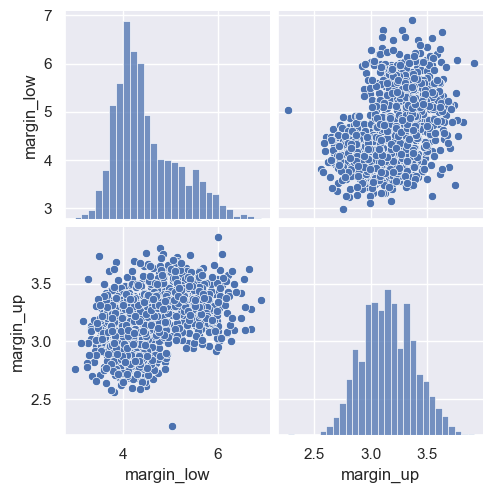

In [187]:
# Analyse graphique

sns.pairplot(df_corr5, kind="scatter")

### Interprétation des résultats :

Comme nous l'avons vu plus tôt, nos deux variables ne suivent pas une distribution normale. 
On remarque un point très éloigné, potentiellement outlier.
Les variables ont l'air corrélées postivement, nous allons le vérifier avec un test de Spearman.

## Corrélation de Spearman

### Hypothèses :

- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [188]:
# Calcul de la corrélation de spearman

spearmanr(df_corr5['margin_low'], df_corr5['margin_up'])

SignificanceResult(statistic=0.4213605366577593, pvalue=4.820137314428162e-64)

### Interprétation des résultats :

Le coefficient de Spearman indique une corrélation monotone, positive et d'intensité assez forte entre les 2 variables.

De plus, la p-valeur est inférieure à 0.05, on peut rejeter l'hypothèse nulle. 


**Confirmation avec coefficient de corrélation de Kendall :**

## Test de corrélation de Kendall
### Hypothèses :
- H0 : Il n'y a pas de corrélation monotone entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

## Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).

In [189]:
# Calcul de la corrélation de kendall

kendalltau(df_corr5['margin_low'], df_corr5['margin_up'])

SignificanceResult(statistic=0.27820029072140723, pvalue=2.697239881625536e-56)

### Interprétation des résultats :

Il y a bien une corrélation entre margin_low et margin_up, monotone, positive et d'intensité moyenne. On peut rejeter à nouveau H0.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.7 - Etude du lien entre is_genuine et margin_low </h3>

In [190]:
# Récupération des données

df_corr6 = df[['margin_low','is_genuine']]
df_corr6.describe()

margin_low   is_genuine
count  1463.000000  1463.000000
mean      4.485967     0.663705
std       0.663813     0.472603
min       2.980000     0.000000
25%       4.015000     0.000000
50%       4.310000     1.000000
75%       4.870000     1.000000
max       6.900000     1.000000

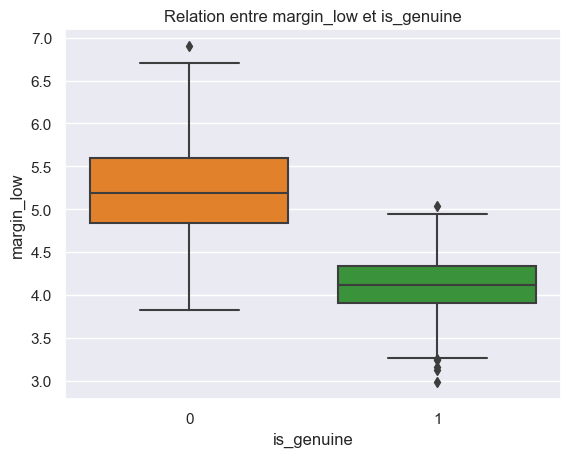

In [191]:
# Analyse graphique

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(data=df_corr6, y='margin_low', x='is_genuine', palette=my_palette)
plt.title("Relation entre margin_low et is_genuine")
plt.show()

### Interprétation des résultats :

Visuellement, on observe une différence très nette de tendances centrales entre les vrais billets (0) et les faux (1). 


Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis pour confirmer ou non notre hypothèse.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [192]:
# Test de Kruskal-Wallis

# Séparer les données en groupes en fonction du type de billet

groupe_vrais = df_corr6[df_corr6['is_genuine'] == 1]['margin_low']
groupe_faux = df_corr6[df_corr6['is_genuine'] == 0]['margin_low']

kruskal_stat, kruskal_p_value = kruskal(groupe_vrais, groupe_faux)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 828.742802832455
P-valeur (Kruskal-Wallis) : 3.040847316225815e-182


### Interprétation des résultats

L'hypothèse nulle peut être rejetée (p-value < 0.05).
On peut donc confirmer que les distributions des deux groupes sont significativement différentes. 

Nous allons le confirmer à nouveau avec un test différent.
Puisqu'on ne peut pas confirmer l'égalité des variances (groupe de 500 et groupe de 1000), nous allons choisir un second test non paramétrique.


## Test de Mann-Whitney ###

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [193]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe_vrais,groupe_faux)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 19094.0
P-valeur (Mann-Whitney) : 3.0465930299427695e-182


### Interprétation des résultats

Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette à nouveau H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

Il y a donc bien un lien entre le type de billet et notre variable margin_low. 
Puisque cette variable est importante, il serait intéressant de récupérer nos valeurs manquantes.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.8 - Etude du lien entre is_genuine et length </h3>

In [194]:
# Récupération des données

df_corr7 = df[['length','is_genuine']]
df_corr7.describe()

length   is_genuine
count  1463.000000  1463.000000
mean    112.674757     0.663705
std       0.873222     0.472603
min     109.490000     0.000000
25%     112.020000     0.000000
50%     112.960000     1.000000
75%     113.340000     1.000000
max     114.320000     1.000000

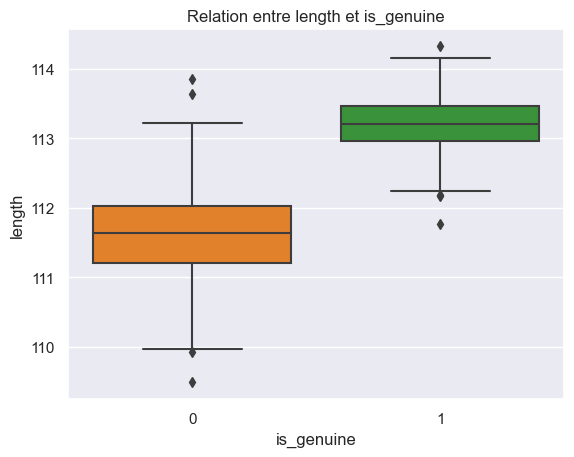

In [195]:
# Analyse graphique

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(data=df_corr7, y='length', x='is_genuine', palette=my_palette)
plt.title("Relation entre length et is_genuine")
plt.show()

### Interprétation des résultats :

Comme précédellent, on observe une différence très nette de tendances centrales entre les vrais billets (0) et les faux (1). 


Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis pour confirmer ou non notre hypothèse.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [196]:
# Test de Kruskal-Wallis

# Séparer les données en groupes en fonction du type de billet

groupe_vrais = df_corr7[df_corr7['is_genuine'] == 1]['length']
groupe_faux = df_corr7[df_corr7['is_genuine'] == 0]['length']

kruskal_stat, kruskal_p_value = kruskal(groupe_vrais, groupe_faux)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 916.9098418068461
P-valeur (Kruskal-Wallis) : 2.069483789921139e-201


### Interprétation des résultats

L'hypothèse nulle peut être rejetée (p-value < 0.05).
On peut donc confirmer que les distributions des deux groupes sont significativement différentes. 

Nous allons le confirmer à nouveau avec un test différent, toujours non paramétrique.

## Test de Mann-Whitney ###

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [197]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe_vrais,groupe_faux)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 470034.5
P-valeur (Mann-Whitney) : 2.0735965473634398e-201


### Interprétation des résultats

Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette à nouveau H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

Il y a donc bien un lien entre le type de billet et notre variable length, qui n'a pas de valeurs manquantes.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.9 - Etude du lien entre is_genuine et height_right </h3>

In [198]:
# Récupération des données

df_corr8 = df[['height_right','is_genuine']]
df_corr8.describe()

height_right   is_genuine
count   1463.000000  1463.000000
mean     103.921476     0.663705
std        0.324181     0.472603
min      102.910000     0.000000
25%      103.710000     0.000000
50%      103.920000     1.000000
75%      104.150000     1.000000
max      104.950000     1.000000

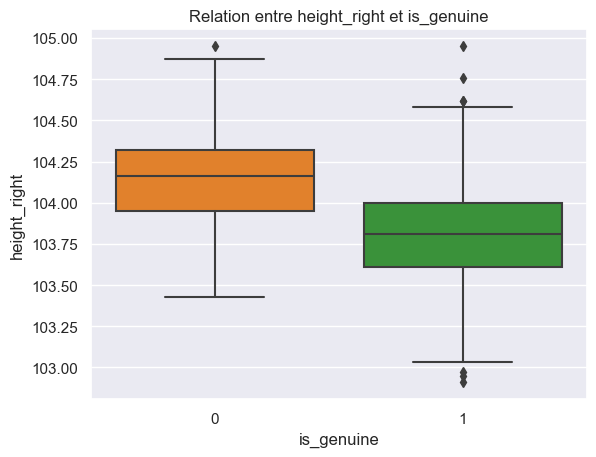

In [199]:
# Analyse graphique

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(data=df_corr8, y='height_right', x='is_genuine', palette=my_palette)
plt.title("Relation entre height_right et is_genuine")
plt.show()

### Interprétation des résultats :

On observe une différence moins marquée de tendances centrales entre les vrais billets (0) et les faux (1). 

Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis pour confirmer ou non un lien.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [200]:
# Test de Kruskal-Wallis

# Séparer les données en groupes en fonction du type de billet

groupe_vrais = df_corr8[df_corr8['is_genuine'] == 1]['height_right']
groupe_faux = df_corr8[df_corr8['is_genuine'] == 0]['height_right']

kruskal_stat, kruskal_p_value = kruskal(groupe_vrais, groupe_faux)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 355.69073046211065
P-valeur (Kruskal-Wallis) : 2.443039630070048e-79


### Interprétation des résultats

L'hypothèse nulle peut être rejetée (p-value < 0.05).
On peut donc confirmer que les distributions des deux groupes sont significativement différentes. 

Nous allons le confirmer à nouveau avec un test différent, toujours non paramétrique.

## Test de Mann-Whitney ###

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [201]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe_vrais,groupe_faux)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 94891.5
P-valeur (Mann-Whitney) : 2.4460677165088598e-79


### Interprétation des résultats

Valeur de p < α : la différence entre les médianes est statistiquement significative, on rejette à nouveau H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

Il y a donc bien un lien entre le type de billet et height_right, cependant il est plus faible qu'avec margin_low, et length.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.10 - Etude du lien entre is_genuine et height_left </h3>

In [202]:
# Récupération des données

df_corr9 = df[['height_left','is_genuine']]
df_corr9.describe()

height_left   is_genuine
count  1463.000000  1463.000000
mean    104.031333     0.663705
std       0.299605     0.472603
min     103.140000     0.000000
25%     103.825000     0.000000
50%     104.040000     1.000000
75%     104.230000     1.000000
max     104.880000     1.000000

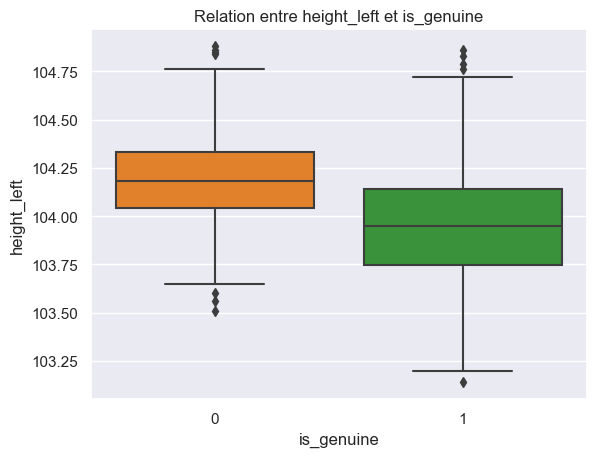

In [203]:
# Analyse graphique

colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.boxplot(data=df_corr9, y='height_left', x='is_genuine', palette=my_palette)
plt.title("Relation entre height_left et is_genuine")
plt.show()

### Interprétation des résultats :

On observe une différence de tendances centrales beaucoup moins nettes entre les vrais billets (0) et les faux (1). 

Nous allons étudier les distributions des différents groupes avec un test de Kruskal-Wallis.

## Test de Kruskal-Wallis 

### Hypothèses :
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [204]:
# Test de Kruskal-Wallis

# Séparer les données en groupes en fonction du type de billet

groupe_vrais = df_corr9[df_corr9['is_genuine'] == 1]['height_left']
groupe_faux = df_corr9[df_corr9['is_genuine'] == 0]['height_left']

kruskal_stat, kruskal_p_value = kruskal(groupe_vrais, groupe_faux)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 221.4021512797039
P-valeur (Kruskal-Wallis) : 4.472423896451488e-50


### Interprétation des résultats

L'hypothèse nulle peut être rejetée (p-value < 0.05).
On peut donc confirmer que les distributions des deux groupes sont significativement différentes.

Cependant la statistique H est plus faible que pour les précédentes variables, la différence est donc moins marquée.

Nous allons le confirmer à nouveau avec un test différent, toujours non paramétrique.

## Test de Mann-Whitney ###

### Hypothèses :
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation :
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [205]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(groupe_vrais,groupe_faux)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney : 125277.0
P-valeur (Mann-Whitney) : 4.476804259028787e-50


### Interprétation des résultats

Valeur de p < α : encore une fois on rejette H0.    
On peut conclure que la différence entre les médianes des 2 groupes est statistiquement significative.

Il y a donc bien un lien entre le type de billet et notre variable height_left. 
Cependant, ce lien est plus faible que pour nos précédentes variables.

Nous allons maintenant vérifier la multicolinéarité de nos données.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.11 - Recherche de multicolinéarité </h3>

In [206]:
# test de colinéarité

import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Ajouter une colonne constante pour la régression linéaire
X = sm.tools.tools.add_constant(quant_vars.iloc[:, 0:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  592495.682281
1      diagonal       1.018610
2   height_left       1.151474
3  height_right       1.260286
4    margin_low       1.913278
5     margin_up       1.419672
6        length       2.131067


### Interprétation des résultats

Pas de valeur > 5, on n'a donc pas de variables colinéaires.

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">3.12 - Recherche de variables constantes </h3>

In [207]:
# Recherche des variables variant très faiblement

from sklearn.feature_selection import VarianceThreshold

In [208]:
# Enregistrement de l'index dans une variable

df_quant = quant_vars.copy()

names = df_quant.index
names

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
           dtype='int64', length=1463)

In [209]:
# Enregistrement des features (noms des colonnes)

features_names = quant_vars.columns
features_names

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [210]:
X = df_quant.values
X.var(axis=0)

array([0.09324036, 0.08970205, 0.10502161, 0.44034601, 0.05353985,
       0.76199487])

In [211]:
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X)
selector.get_support()

array([ True,  True,  True,  True,  True,  True])

La variable qui varie le moins est margin_up.

Celle qui varie le plus est length, elle est suivie de margin_low.

<div style="background-color: RGB(24,29,198);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Traitement des valeurs manquantes sur margin_low </h2>

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.1 - Préparation des données </h3>

In [212]:
# Récupération des données nan et préparation

# Enregistrement de l'index

names_new = df_nan.index

# Suppression colonne catégorielle 

df_nan_quant = df_nan.drop('is_genuine', axis=1)

# Enregistrement des colonnes des nan

features_new = df_nan_quant.columns

# Récupération des données sous forme de matrice 
x_new = df_nan.values 
x_new.shape

(37, 7)

In [213]:
# Enregistrement des colonnes et de l'index des données

df_reg = df.drop('is_genuine', axis=1)
features = df_reg.columns
names = df_reg.index

# Récupération des données sous forme de matrice 

x = df_reg.values 
x.shape

(1463, 6)

In [214]:
x[:10]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54],
       [172.17, 103.74, 104.08,   4.42,   2.95, 112.81],
       [172.34, 104.18, 103.85,   4.58,   3.26, 112.81],
       [171.88, 103.76, 104.08,   3.98,   2.92, 113.08],
       [172.47, 103.92, 103.67,   4.  ,   3.25, 112.85],
       [172.47, 104.07, 104.02,   4.04,   3.25, 113.45]])

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.2 - Première analyse </h3>

In [215]:
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

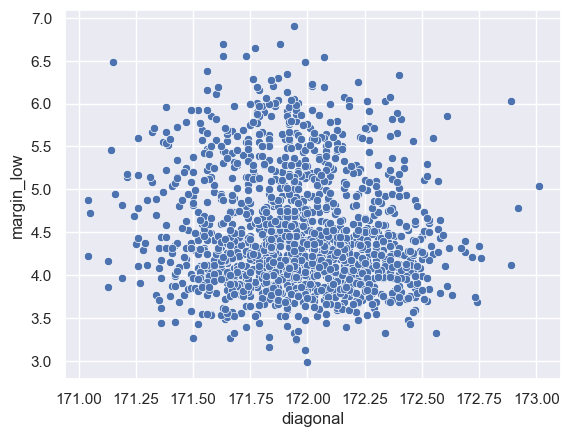

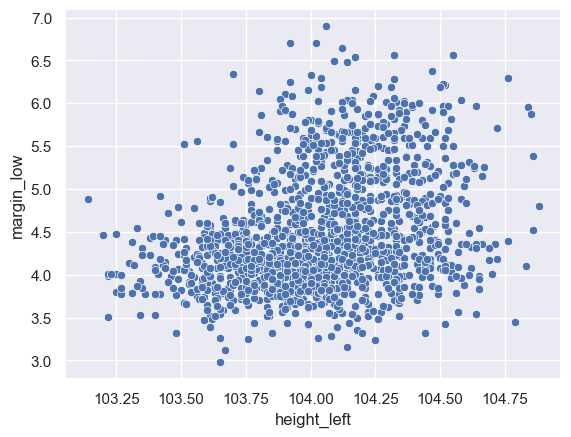

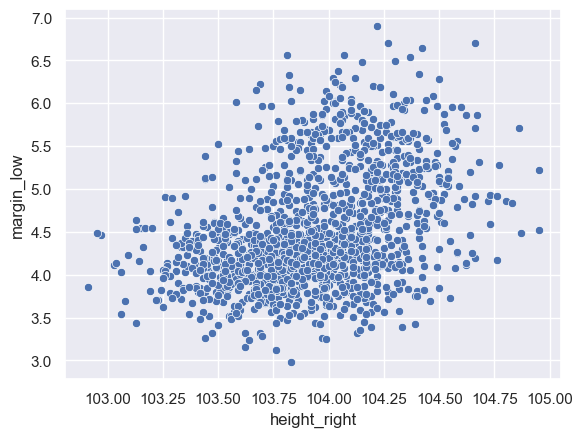

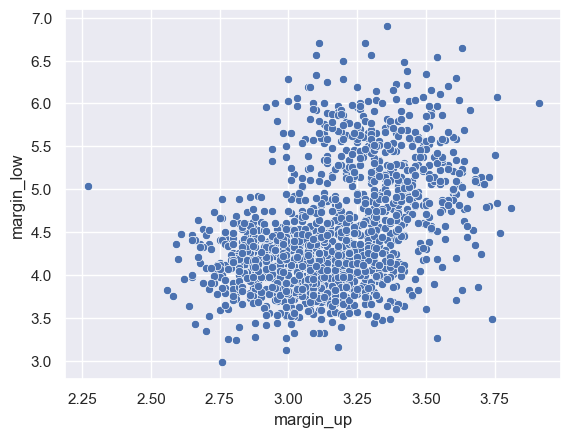

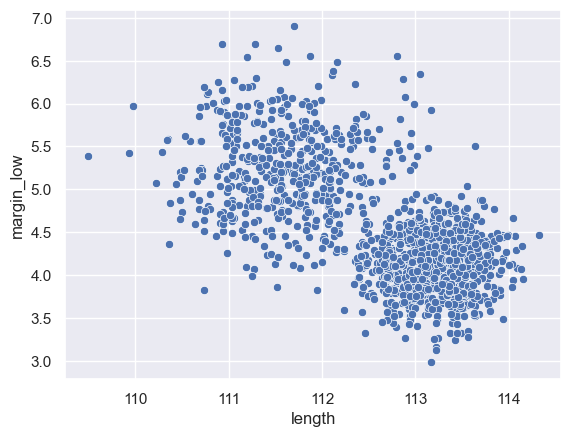

In [216]:
# On regarde si on pourrait prédire les valeurs manquantes sur l'ensemble


# Extraction des colonnes de variables explicatives
X = df_reg.drop('margin_low', axis=1)


# Extraction de la variable cible
Y = df_reg['margin_low']

# Affichage des nuages de points entre la variable à expliquer et toutes 
# les variables explicatives
for col in X.columns:
    sns.scatterplot(x=X[col], y=df_reg['margin_low'])
    plt.show()

<Axes: >

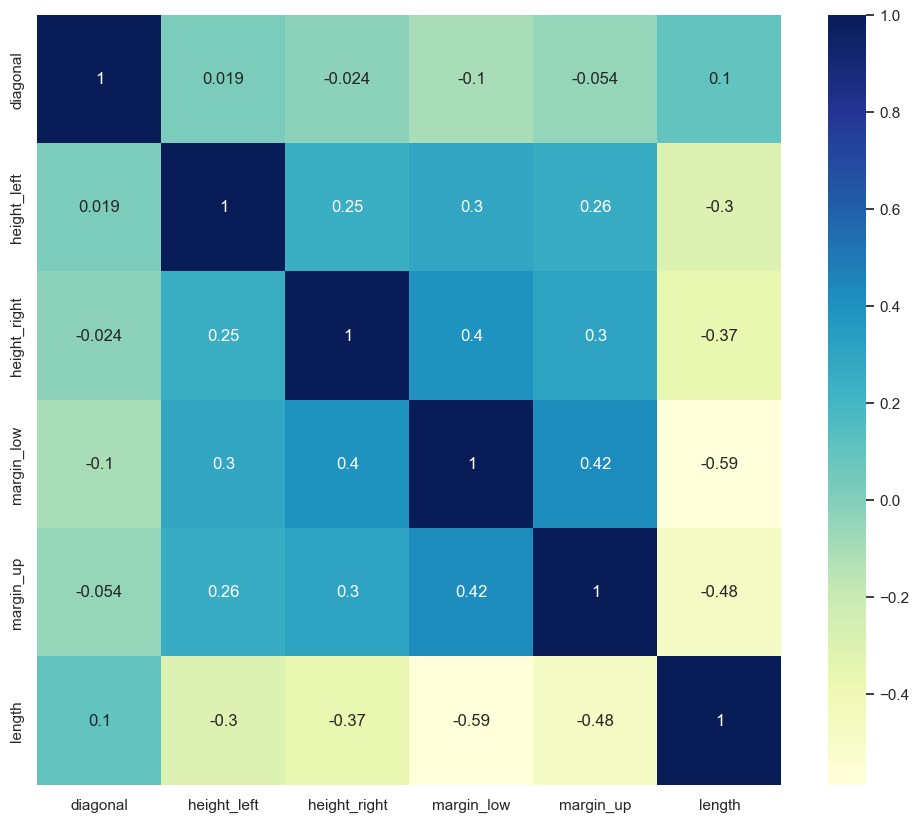

In [217]:
# Calcul de la matrice de corrélation
corr_matrix = df_reg.corr(method = 'spearman')


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [218]:
# Extraction des variables ayant une corrélation supérieure à 0.5 avec la variable d'intérêt
corr_threshold = 0.5
corr_vars = corr_matrix[abs(corr_matrix['margin_low']) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (margin_low) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (margin_low) :

['margin_low', 'length']


In [219]:
# Extraction des variables ayant une corrélation inférieur à -0.5 avec la variable d'intérêt
corr_threshold = -0.5
corr_vars = corr_matrix[abs(corr_matrix['margin_low']) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.5 avec la variable d'intérêt (margin_low) :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à -0.5 avec la variable d'intérêt (margin_low) :

[]


<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.3 - Division en Train et en Test </h3>

In [220]:
# Importation de librairies supplémentaires 

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, median_absolute_error 

In [221]:
# Diviser les données en ensembles d'apprentissage et de test

train, test = train_test_split(df_reg, test_size=0.2, random_state=42)

# Séparation des variables prédictives et de la variable cible
X_train = train.drop('margin_low', axis=1)
y_train = train['margin_low']


X_test = test.drop('margin_low', axis=1)
y_test = test['margin_low']

In [222]:
train.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1170.000000  1170.000000   1170.000000  1170.000000  1170.000000   
mean    171.962906   104.036077    103.922222     4.484786     3.154085   
std       0.299311     0.300680      0.327694     0.667411     0.234868   
min     171.050000   103.140000    102.910000     2.980000     2.270000   
25%     171.752500   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.240000    104.150000     4.860000     3.310000   
max     172.890000   104.880000    104.950000     6.900000     3.910000   

            length  
count  1170.000000  
mean    112.674205  
std       0.875115  
min     109.970000  
25%     112.035000  
50%     112.950000  
75%     113.337500  
max     114.320000

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.4 - Modèle de base </h3>

In [223]:
# Conversion en matrice

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [224]:
# Entraînement du modèle de base (1 par la  moyenne et 1 par la médiane)

lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 
y_predict_dummy_mean = lm_dummy_mean.predict(X_test) 

lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train) 
y_predict_dummy_median = lm_dummy_median.predict(X_test) 

In [225]:
# Obtention des prédictions et des métriques d'évaluation du modèle dummy_mean

y_train_pred_mean = lm_dummy_mean.predict(X_train)
y_test_pred_mean = lm_dummy_mean.predict(X_test)
r2_train_mean = r2_score(y_train, y_train_pred_mean)
r2_test_mean = r2_score(y_test, y_test_pred_mean)
mse_train_mean = mean_squared_error(y_train, y_train_pred_mean)
mse_test_mean = mean_squared_error(y_test, y_test_pred_mean)
rmse_train_mean = np.sqrt(mse_train_mean)
rmse_test_mean = np.sqrt(mse_test_mean)

In [226]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train_mean, mse_train_mean, rmse_train_mean],
    'Test': [r2_test_mean, mse_test_mean, rmse_test_mean]
})

print(df_metrics)

  Métrique     Train      Test
0       R2  0.000000 -0.000082
1      MSE  0.445057  0.421540
2     RMSE  0.667126  0.649261


In [227]:
# Obtention des prédictions et des métriques d'évaluation du modèle dummy_median

y_train_pred_med = lm_dummy_median.predict(X_train)
y_test_pred_med = lm_dummy_median.predict(X_test)
r2_train_med = r2_score(y_train, y_train_pred_med)
r2_test_med = r2_score(y_test, y_test_pred_med)
mse_train_med = mean_squared_error(y_train, y_train_pred_med)
mse_test_med = mean_squared_error(y_test, y_test_pred_med)
rmse_train_med = np.sqrt(mse_train_med)
rmse_test_med = np.sqrt(mse_test_med)

In [228]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train_med, mse_train_med, rmse_train_med],
    'Test': [r2_test_med, mse_test_med, rmse_test_med]
})

print(df_metrics)

  Métrique     Train      Test
0       R2 -0.068643 -0.077451
1      MSE  0.475608  0.454152
2     RMSE  0.689643  0.673908


On se basera sur les scores de dummy_median puisque la distribution n'est pas normale

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.5 - Régression linéaire </h3>

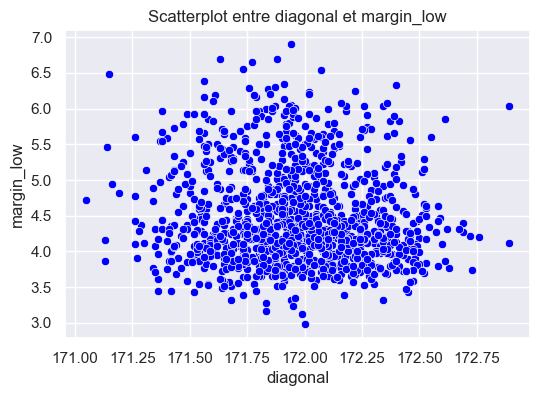

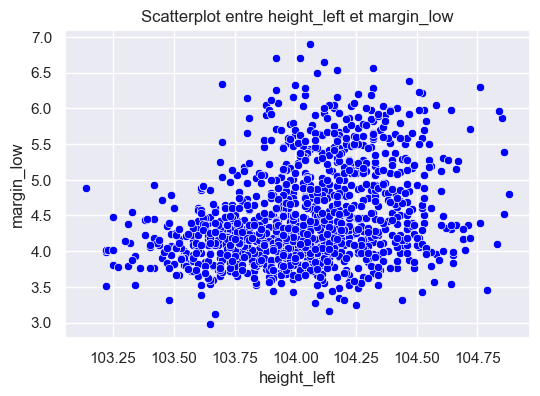

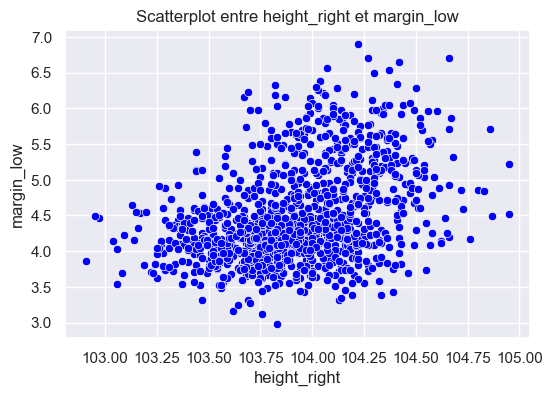

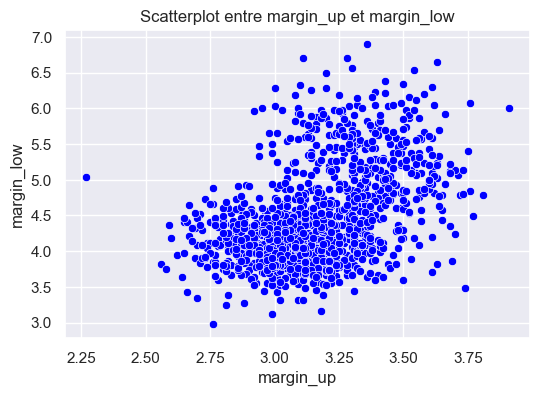

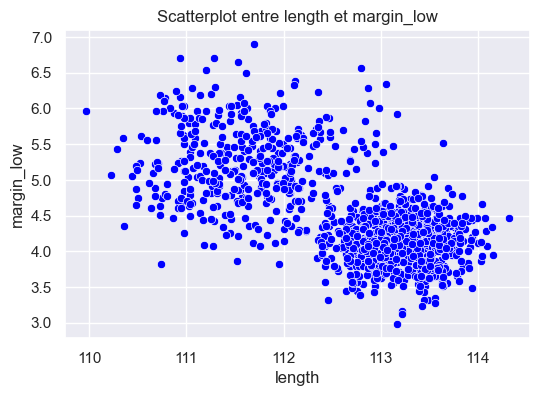

In [229]:
# Affichage des nuages de points entre la variable d'intérêt et les autres 

target_col = 'margin_low'
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f'Scatterplot entre {col} et {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

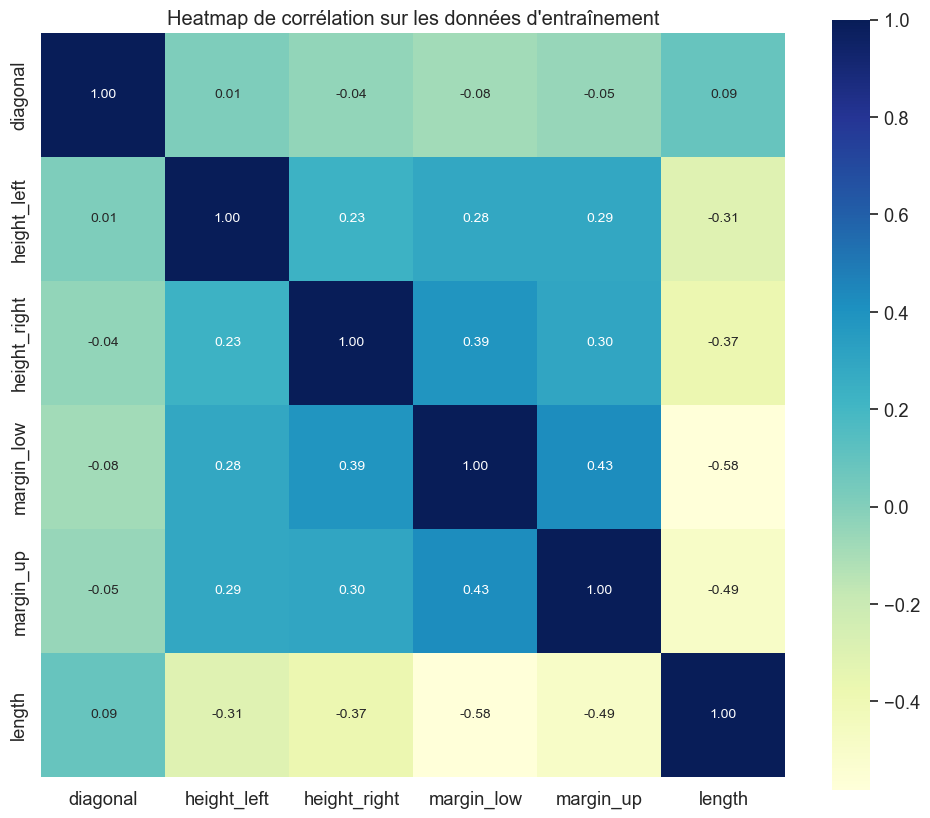

In [230]:
# Calcul de la matrice de corrélation sur les données d'entraînement
corr_matrix_train = train.corr(method = 'spearman')


sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_train, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Affichage du graphique

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()

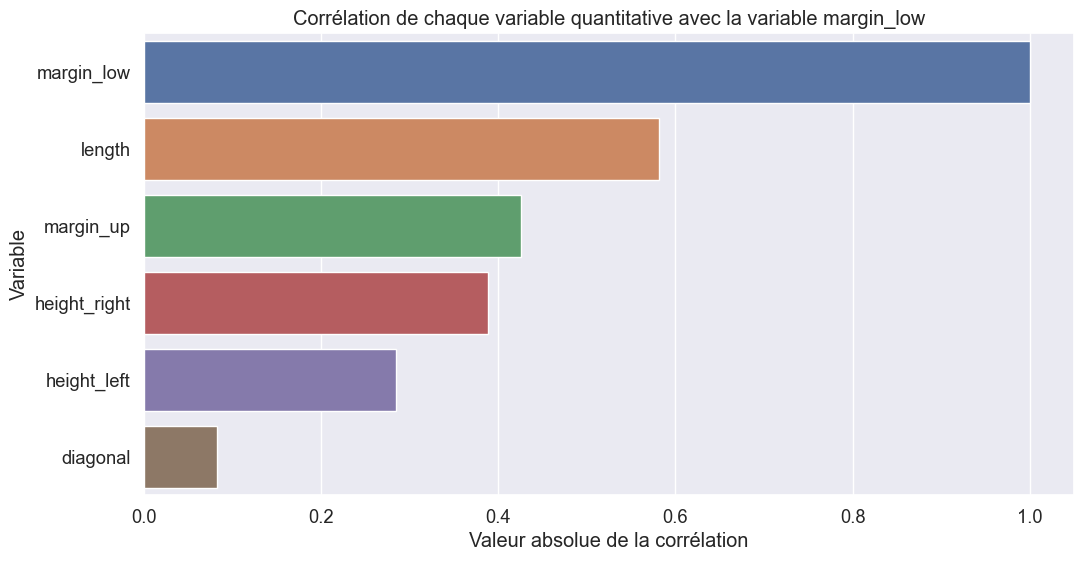

In [231]:
# Sélection de variables à partir de la corr. de spearman

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr(method = 'spearman')['margin_low']).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Valeur absolue de la corrélation')
plt.ylabel('Variable')
plt.title('Corrélation de chaque variable quantitative avec la variable margin_low')
plt.show()

In [232]:
# Modélisation sur la base du train 

# Test 1 : régression linéaire simple avec la variable lenght 

# Séparation des variables prédictives et de la variable cible
X_train = train['length']
y_train = train['margin_low']


X_test = test['length']
y_test = test['margin_low']

# Fit du 1er modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

Coef.  Std.Err.          t          P>|t|     [0.025     0.975]
const   60.705029  1.901646  31.922361  2.780726e-161  56.974005  64.436053
length  -0.498963  0.016877 -29.564881  7.173831e-144  -0.532075  -0.465850

La p-valeur de notre variable length est bien <0.05, on peut donc accepter que son coefficient est significatif

In [233]:
lr_model.summary2().tables[0]

0                 1                    2          3
0               Model:               OLS      Adj. R-squared:      0.428
1  Dependent Variable:        margin_low                 AIC:  1723.4878
2                Date:  2024-04-20 18:35                 BIC:  1733.6173
3    No. Observations:              1170      Log-Likelihood:    -859.74
4            Df Model:                 1         F-statistic:      874.1
5        Df Residuals:              1168  Prob (F-statistic):  7.17e-144
6           R-squared:             0.428               Scale:    0.25499

In [234]:
# Obtention des prédictions et des métriques d'évaluation

y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [235]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)

  Métrique     Train      Test
0       R2  0.428035  0.513607
1      MSE  0.254557  0.205017
2     RMSE  0.504537  0.452788


Notre modèle montre des meilleurs scores que le remplacement par la médiane : 

Rappel des scores du modèle de base : 

- Sur la base du Train : R2 à -0.06, MSE à 1.08 et RMSE à 1.04
- Sur la base du Test : R2 à -0.08, MSE à 1.03 et RMSE à 1.06

In [236]:
lr_model.pvalues

const     2.780726e-161
length    7.173831e-144
dtype: float64

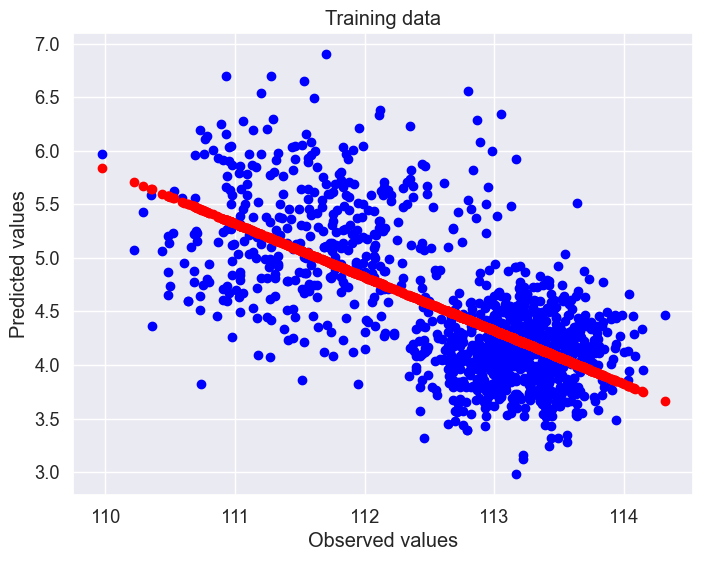

In [237]:
# Visualiser les valeurs observées en fonction des valeurs prédites dans le train

plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_train, y_train_pred, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

In [238]:
# Test 2 : régression multiple

# On teste cette fois une régression linéaire multiple avec toutes les variables quantitatives

# Séparation des variables prédictives et de la variable cible
X_train = train.drop('margin_low', axis=1)
y_train = train['margin_low']

X_test = test.drop('margin_low', axis=1)
y_test = test['margin_low']

# Fit du modèle linéaire
lr_model2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table2 = lr_model2.summary2().tables[1]
results_table2

Coef.   Std.Err.          t         P>|t|    [0.025  \
const         20.396010  11.265864   1.810426  7.048756e-02 -1.707662   
diagonal      -0.087151   0.048232  -1.806921  7.103266e-02 -0.181782   
height_left    0.154745   0.051131   3.026451  2.528799e-03  0.054426   
height_right   0.259947   0.048384   5.372546  9.370058e-08  0.165017   
margin_up      0.290974   0.073292   3.970093  7.624626e-05  0.147176   
length        -0.398987   0.020702 -19.272639  4.719428e-72 -0.439605   

                 0.975]  
const         42.499681  
diagonal       0.007480  
height_left    0.255064  
height_right   0.354877  
margin_up      0.434773  
length        -0.358369

La variable la moins statistiquement significative est la variable diagonale (coeff le plus proche de 0 avec p-value > 0.05)

In [239]:
lr_model2.summary2().tables[0]

0                 1                    2          3
0               Model:               OLS      Adj. R-squared:      0.458
1  Dependent Variable:        margin_low                 AIC:  1663.1602
2                Date:  2024-04-20 18:35                 BIC:  1693.5487
3    No. Observations:              1170      Log-Likelihood:    -825.58
4            Df Model:                 5         F-statistic:      198.7
5        Df Residuals:              1164  Prob (F-statistic):  3.54e-153
6           R-squared:             0.460               Scale:    0.24135

In [240]:
# Obtention des prédictions et des métriques d'évaluation

y_train_pred = lr_model2.predict(sm.add_constant(X_train))
y_test_pred = lr_model2.predict(sm.add_constant(X_test))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_adjusted_train = lr_model2.rsquared_adj
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [241]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'R2_adjusted', 'MSE', 'RMSE'],
    'Train': [r2_train, r2_adjusted_train, mse_train, rmse_train],
    'Test': [r2_test, '',mse_test, rmse_test]
})

print(df_metrics)

      Métrique     Train      Test
0           R2  0.460481  0.545796
1  R2_adjusted  0.458163          
2          MSE  0.240117   0.19145
3         RMSE  0.490017  0.437549


Résultats un peu plus performants

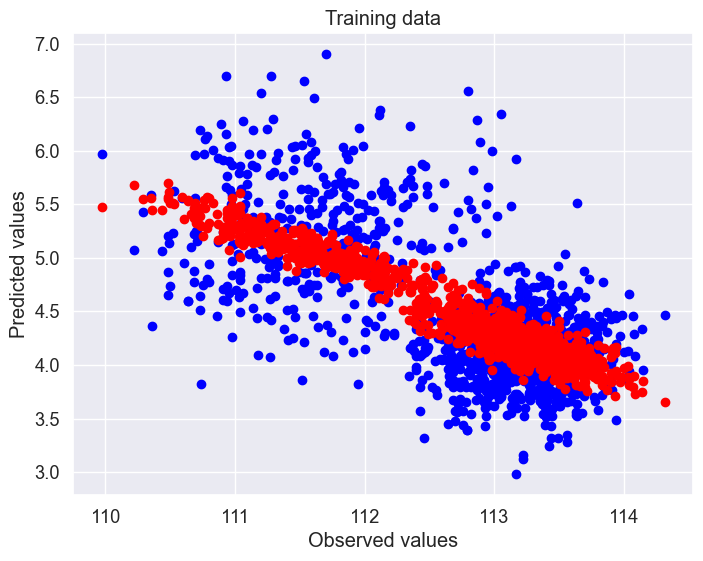

In [242]:
# Visualiser les valeurs observées en fonction des valeurs prédites dans le train

plt.figure(figsize=(8, 6))

plt.scatter(X_train['length'], y_train, color='blue')
plt.scatter(X_train['length'], y_train_pred, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

In [243]:
# Vérification de non colinéarité

# Ajouter une colonne constante pour la régression linéaire
X_reg = sm.tools.tools.add_constant(df_reg.iloc[:, 1:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  313283.808503
1   height_left       1.147526
2  height_right       1.259215
3    margin_low       1.903892
4     margin_up       1.419586
5        length       2.126807


In [244]:
# On teste cette fois sans la variable diagonal (la moins significative)

# Séparation des variables prédictives et de la variable cible
X_train = train.drop(['margin_low','diagonal'], axis=1)
y_train = train['margin_low']

X_test = test.drop(['margin_low','diagonal'], axis=1)
y_test = test['margin_low']

# Fit du modèle linéaire
lr_model3 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [245]:
# Obtention du tableau de résultats
results_table3 = lr_model3.summary2().tables[1]
results_table3

Coef.  Std.Err.          t         P>|t|    [0.025     0.975]
const         6.077539  8.015664   0.758208  4.484799e-01 -9.649211  21.804290
height_left   0.150727  0.051132   2.947797  3.264247e-03  0.050406   0.251048
height_right  0.260242  0.048431   5.373456  9.322519e-08  0.165220   0.355264
margin_up     0.293534  0.073349   4.001879  6.680902e-05  0.149623   0.437445
length       -0.401552  0.020674 -19.423429  5.067319e-73 -0.442113  -0.360990

Cette fois-ci, c'est la constante qui est la moins significative

In [246]:
lr_model3.summary2().tables[0]

0                 1                    2          3
0               Model:               OLS      Adj. R-squared:      0.457
1  Dependent Variable:        margin_low                 AIC:  1664.4374
2                Date:  2024-04-20 18:35                 BIC:  1689.7612
3    No. Observations:              1170      Log-Likelihood:    -827.22
4            Df Model:                 4         F-statistic:      247.1
5        Df Residuals:              1165  Prob (F-statistic):  1.07e-153
6           R-squared:             0.459               Scale:    0.24182

In [247]:
# Obtention des prédictions et des métriques d'évaluation

y_train_pred = lr_model3.predict(sm.add_constant(X_train))
y_test_pred = lr_model3.predict(sm.add_constant(X_test))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_adjusted_train = lr_model3.rsquared_adj
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [248]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'R2_adjusted', 'MSE', 'RMSE'],
    'Train': [r2_train, r2_adjusted_train, mse_train, rmse_train],
    'Test': [r2_test, '', mse_test, rmse_test]
    })

print(df_metrics)


      Métrique     Train      Test
0           R2  0.458967   0.53926
1  R2_adjusted  0.457110          
2          MSE  0.240790  0.194204
3         RMSE  0.490704  0.440686


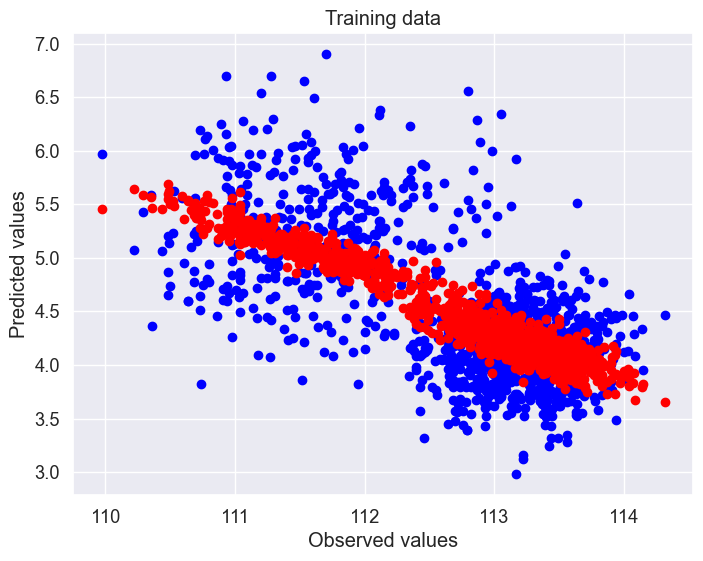

In [249]:
# Visualiser les valeurs observées en fonction des valeurs prédites dans le train

plt.figure(figsize=(8, 6))

plt.scatter(X_train['length'], y_train, color='blue')
plt.scatter(X_train['length'], y_train_pred, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

In [250]:
# Vérification de non colinéarité

# Ajouter une colonne constante pour la régression linéaire
X_reg = sm.tools.tools.add_constant(df_reg.iloc[:, 1:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  313283.808503
1   height_left       1.147526
2  height_right       1.259215
3    margin_low       1.903892
4     margin_up       1.419586
5        length       2.126807


In [251]:
# Test 4 : sans la constante 

# Séparation des variables prédictives et de la variable cible
X_train = train.drop(['margin_low','diagonal'], axis=1)
y_train = train['margin_low']

X_test = test.drop(['margin_low','diagonal'], axis=1)
y_test = test['margin_low']

# Fit du modèle linéaire
lr_model4 = sm.OLS(y_train, X_train).fit()

In [252]:
# Obtention du tableau de résultats
results_table4 = lr_model4.summary2().tables[1]
results_table4

Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
height_left   0.175760  0.039037   4.502434   7.391678e-06  0.099170  0.252350
height_right  0.283590  0.037374   7.587922   6.626067e-14  0.210262  0.356917
margin_up     0.294641  0.073321   4.018497   6.232521e-05  0.150785  0.438497
length       -0.392292  0.016678 -23.521624  1.968097e-100 -0.425014 -0.359570

In [253]:
lr_model4.summary2().tables[0]

0                 1                             2  \
0                   Model:               OLS  Adj. R-squared (uncentered):   
1      Dependent Variable:        margin_low                          AIC:   
2                    Date:  2024-04-20 18:35                          BIC:   
3        No. Observations:              1170               Log-Likelihood:   
4                Df Model:                 4                  F-statistic:   
5            Df Residuals:              1166           Prob (F-statistic):   
6  R-squared (uncentered):             0.988                        Scale:   

           3  
0      0.988  
1  1663.0146  
2  1683.2736  
3    -827.51  
4  2.458e+04  
5       0.00  
6    0.24174

De bien meilleurs résultats à priori

In [254]:
# Obtention des prédictions et des métriques d'évaluation

y_train_pred = lr_model4.predict(X_train)
y_test_pred = lr_model4.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_adjusted_train = lr_model4.rsquared_adj
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [255]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'R2_adjusted', 'MSE', 'RMSE'],
    'Train': [r2_train, r2_adjusted_train, mse_train, rmse_train],
    'Test': [r2_test, '',mse_test, rmse_test]
})

print(df_metrics)

      Métrique     Train      Test
0           R2  0.458700  0.539374
1  R2_adjusted  0.988241          
2          MSE  0.240909  0.194156
3         RMSE  0.490825  0.440632


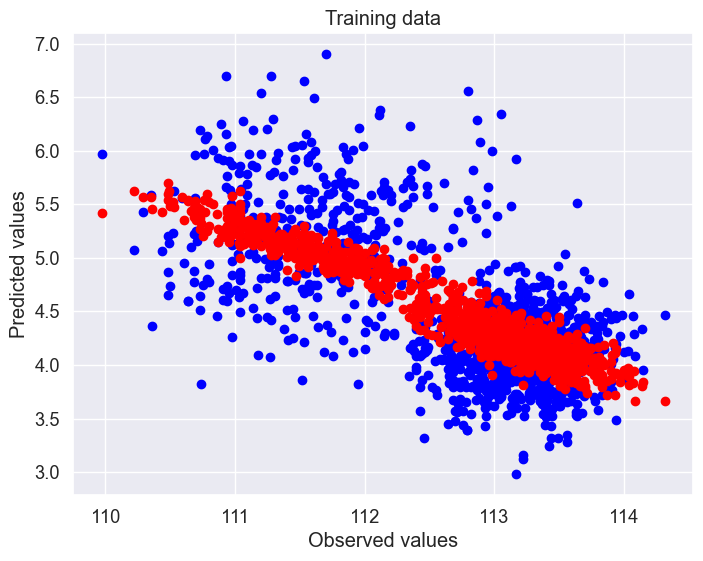

In [256]:
# Visualiser les valeurs observées en fonction des valeurs prédites dans le train

plt.figure(figsize=(8, 6))

plt.scatter(X_train['length'], y_train, color='blue')
plt.scatter(X_train['length'], y_train_pred, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

In [257]:
# Vérification de non colinéarité

# Ajouter une colonne constante pour la régression linéaire
X_reg = sm.tools.tools.add_constant(df_reg.iloc[:, 1:])

# Calculer les VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]

# Afficher les résultats
print(vif_data)

       Variable            VIF
0         const  313283.808503
1   height_left       1.147526
2  height_right       1.259215
3    margin_low       1.903892
4     margin_up       1.419586
5        length       2.126807


In [258]:
# pip install yellowbrick

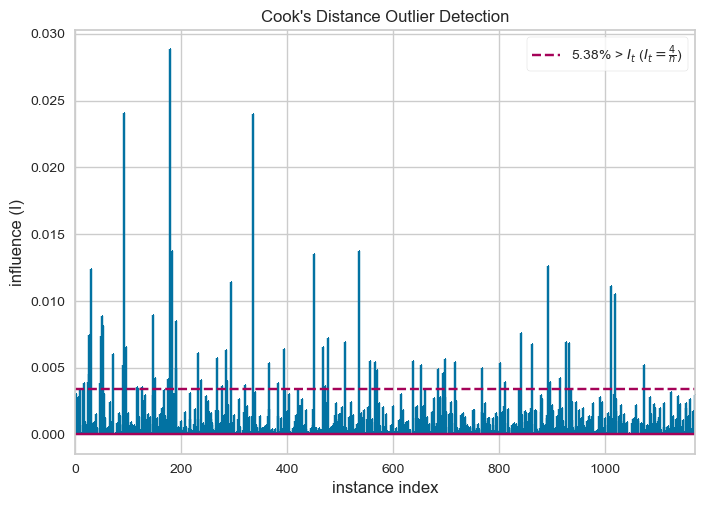

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [259]:
# Calcul de la distance de Cook (on cherche à améliorer notre modèle 
# en cherchant des potentielles valeurs aberrantes influentes)

from yellowbrick.regressor import CooksDistance

# Instance et fit du visualizer

visualizer = CooksDistance()
visualizer.fit(X_train, y_train)
visualizer.show()

### Vérification des conditions pour appliquer la régression linéaire

In [260]:
# Calcul des résidus

residues = lr_model4.resid_pearson
residues_std = residues/np.sqrt(sum(residues**2)/(len(residues)-1))

In [261]:
residues.mean()

3.976415840013713e-05

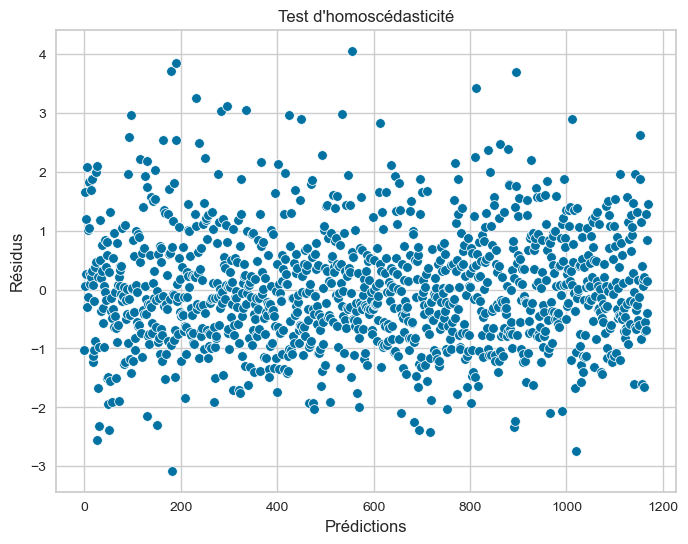

In [262]:
# Vérification de l'homoscédasticité

plt.figure(figsize=(8, 6))
sns.scatterplot(residues_std)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [263]:
# Pas de pattern spécifique, le test visuel pourrait suffire
# (Test de Breusch-Pagan passe très rarement)

# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model4.resid, lr_model4.model.exog)
print("Test de Breusch-Pagan : statistique = %f, p-value = %f" % (bp_test[0], bp_test[1]))

Test de Breusch-Pagan : statistique = 358.822152, p-value = 0.000000


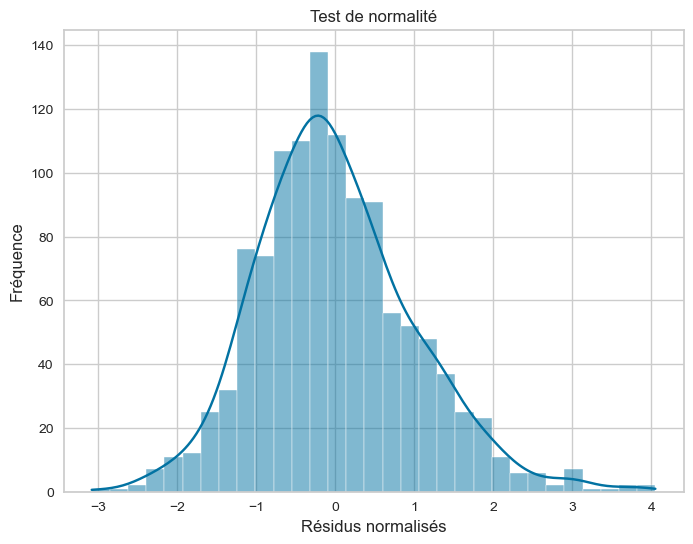

In [264]:
# Test de normalité des résidus 

resid_norm = lr_model4.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()

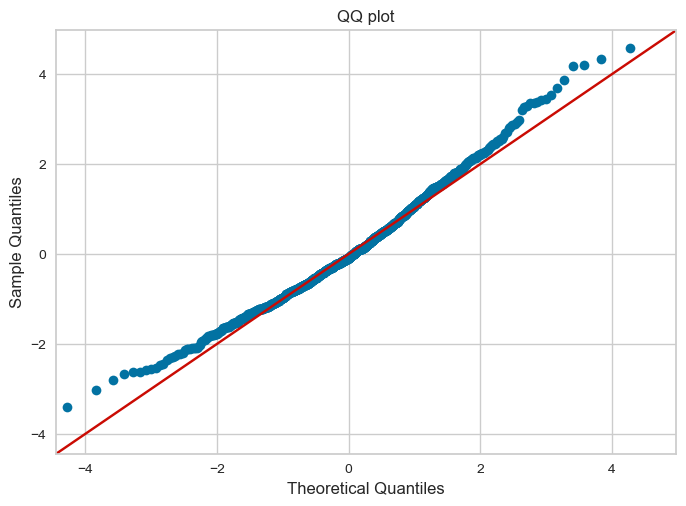

In [265]:
# QQ plot

fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')
plt.title("QQ plot")
plt.show()

Normalité rejetée

In [266]:
# Test de Shapiro-Wilk

# H0 = données normalement distribuées
# H1 = anomalie dans la distribution

stats.shapiro(residues)

ShapiroResult(statistic=0.9838168621063232, pvalue=3.9762429460132864e-10)

Normalité rejetée

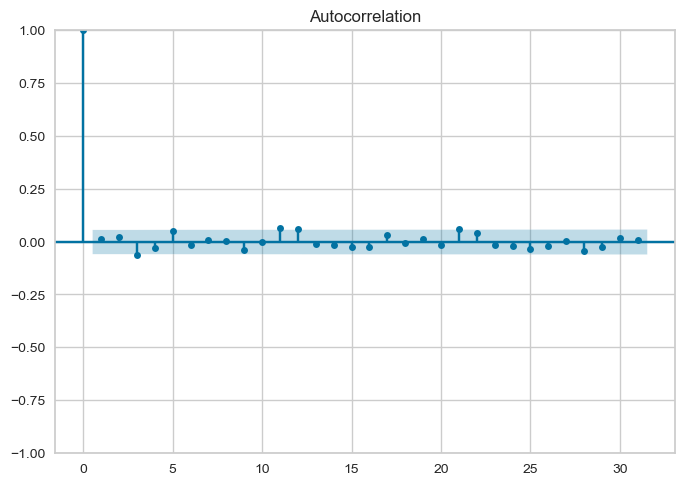

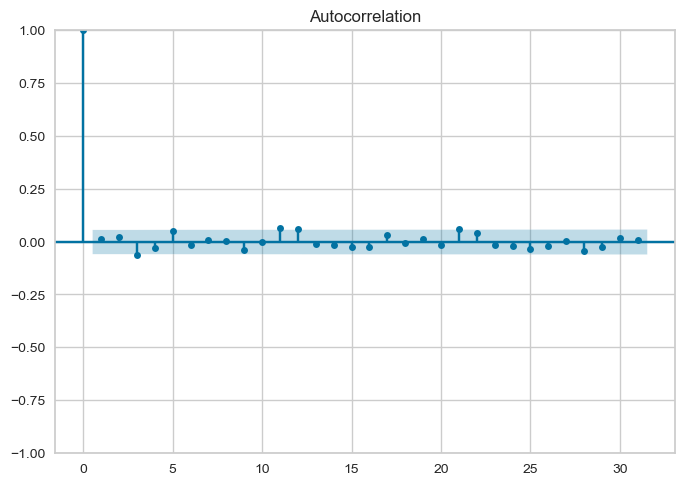

In [267]:
# Indépendance des résidus

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residues)

Les batonnets ne dépassent pas la zone bleue : test concluant

In [268]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test

print(durbin_watson(lr_model4.resid))

1.974837781307245


Valeur très proche de 2 = nous indique que les variables ne sont pas autocorrélées

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.6 - Entraînement du modèle retenu </h3>

In [269]:
# On va entraîner notre modèle sur l'ensemble des données avant de faire la prédiction 

# Séparation des variables prédictives et de la variable cible
X = df.drop(['margin_low','diagonal','is_genuine'], axis=1)
y = df['margin_low']

In [270]:
# Fit du modèle linéaire

lr_model4 = sm.OLS(y, X).fit()

In [271]:
# Obtention du tableau de résultats
results_table4 = lr_model4.summary2().tables[1]
results_table4

Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
height_left   0.199373  0.034420   5.792342   8.488207e-09  0.131855  0.266891
height_right  0.275462  0.033266   8.280524   2.740273e-16  0.210207  0.340716
margin_up     0.260037  0.064468   4.033571   5.777835e-05  0.133577  0.386497
length       -0.405604  0.014475 -28.020905  1.350028e-138 -0.433999 -0.377210

In [272]:
lr_model4.summary2().tables[0]

0                 1                             2  \
0                   Model:               OLS  Adj. R-squared (uncentered):   
1      Dependent Variable:        margin_low                          AIC:   
2                    Date:  2024-04-20 18:35                          BIC:   
3        No. Observations:              1463               Log-Likelihood:   
4                Df Model:                 4                  F-statistic:   
5            Df Residuals:              1459           Prob (F-statistic):   
6  R-squared (uncentered):             0.989                        Scale:   

           3  
0      0.989  
1  2018.4037  
2  2039.5567  
3    -1005.2  
4  3.205e+04  
5       0.00  
6    0.23201

In [273]:
# Obtention des prédictions et des métriques d'évaluation

y_pred = lr_model4.predict(X)

r2_train = r2_score(y, y_pred)
mse_train = mean_squared_error(y, y_pred)
rmse_train = np.sqrt(mse_train)
r2_adjusted = lr_model4.rsquared_adj

In [274]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'R2_adjusted','MSE', 'RMSE'],
    'Train': [r2_train, r2_adjusted, mse_train, rmse_train]
})

print(df_metrics)

      Métrique     Train
0           R2  0.474559
1  R2_adjusted  0.988718
2          MSE  0.231376
3         RMSE  0.481015


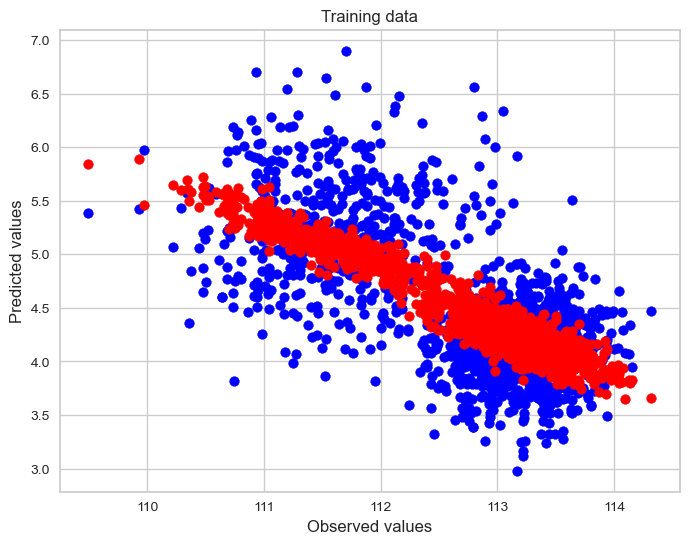

In [275]:
# Visualiser les valeurs observées en fonction des valeurs prédites dans le train

plt.figure(figsize=(8, 6))

plt.scatter(X['length'], y, color='blue')
plt.scatter(X['length'], y_pred, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

<div style="border: 1px solid RGB(24,29,198);" >
<h3 style="margin: auto; padding: 20px; color: RGB(24,29,198); ">4.7 - Prédictions des valeurs manquantes </h3>

In [276]:
# On va donc utiliser notre modèle pour prédire nos valeurs manquantes 

df_nan_quant.shape

(37, 6)

In [277]:
df_nan_quant.head()

diagonal  height_left  height_right  margin_low  margin_up  length
72     171.94       103.89        103.45         NaN       3.25  112.79
99     171.93       104.07        104.18         NaN       3.14  113.08
151    172.07       103.80        104.38         NaN       3.02  112.93
197    171.45       103.66        103.80         NaN       3.62  113.27
241    171.83       104.14        104.06         NaN       3.02  112.36

In [278]:
X_new = df_nan_quant.drop(['margin_low','diagonal'], axis=1)
y_new = df_nan_quant['margin_low']

In [279]:
# Prédiction pour combler les nan 

predictions = lr_model4.predict(X_new)

In [280]:
df_nan['margin_low'] = predictions.values

C:\Users\leacr\AppData\Local\Temp\ipykernel_16992\162131505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['margin_low'] = predictions.values


In [281]:
df_nan['margin_low'] = round(df_nan['margin_low'],2)

C:\Users\leacr\AppData\Local\Temp\ipykernel_16992\1966109313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['margin_low'] = round(df_nan['margin_low'],2)


In [282]:
df_nan

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72             1    171.94       103.89        103.45        4.31       3.25   
99             1    171.93       104.07        104.18        4.40       3.14   
151            1    172.07       103.80        104.38        4.43       3.02   
197            1    171.45       103.66        103.80        4.26       3.62   
241            1    171.83       104.14        104.06        4.64       3.02   
251            1    171.80       103.26        102.82        3.75       2.95   
284            1    171.92       103.83        103.76        4.17       3.23   
334            1    171.85       103.70        103.96        4.11       3.00   
410            1    172.56       103.72        103.51        4.19       3.12   
413            1    172.30       103.66        103.50        4.19       3.16   
445            1    172.34       104.42        103.22        4.21       3.01   
481            1    171.81       103.53        103.96        3.75       2.71   
505            1    172.01       103.97        104.05        4.07       2.98   
611            1    171.80       103.68        103.49        4.27       3.30   
654            1    171.97       103.69        103.54        4.15       2.70   
675            1    171.60       103.85        103.91        4.05       2.56   
710            1    172.03       103.97        103.86        4.45       3.07   
739            1    172.07       103.74        103.76        4.47       3.09   
742            1    172.14       104.06        103.96        4.36       3.24   
780            1    172.41       103.95        103.79        4.13       3.13   
798            1    171.96       103.84        103.62        3.61       3.01   
844            1    171.62       104.14        104.49        4.35       2.99   
845            1    172.02       104.21        104.05        4.11       2.90   
871            1    171.37       104.07        103.75        4.18       3.07   
895            1    171.81       103.68        103.80        3.87       2.98   
919            1    171.92       103.68        103.45        3.73       2.58   
945            1    172.09       103.74        103.52        4.24       3.02   
946            1    171.63       103.87        104.66        4.69       3.27   
981            1    172.02       104.23        103.72        4.15       2.99   
1076           0    171.57       104.27        104.44        5.02       3.21   
1121           0    171.40       104.38        104.19        4.75       3.17   
1176           0    171.59       104.05        103.94        5.02       3.02   
1303           0    172.17       104.49        103.76        5.07       2.93   
1315           0    172.08       104.15        104.17        4.80       3.40   
1347           0    171.72       104.46        104.12        5.70       3.61   
1435           0    172.66       104.33        104.41        5.27       3.56   
1438           0    171.90       104.28        104.29        5.14       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [283]:
df_complet = pd.concat([df, df_nan], ignore_index=False)

In [284]:
# Affichage

df_complet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1303           0    172.17       104.49        103.76        5.07       2.93   
1315           0    172.08       104.15        104.17        4.80       3.40   
1347           0    171.72       104.46        104.12        5.70       3.61   
1435           0    172.66       104.33        104.41        5.27       3.56   
1438           0    171.90       104.28        104.29        5.14       3.24   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49  

[1500 rows x 7 columns]

In [285]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


In [286]:
df_complet.describe()

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.483353   
std       0.471562     0.305195     0.299462      0.325627     0.659693   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.020000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000

In [287]:
df_original.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [288]:
# Nombre de vrais / faux billets

df_complet.is_genuine.value_counts()

1    1000
0     500
Name: is_genuine, dtype: int64

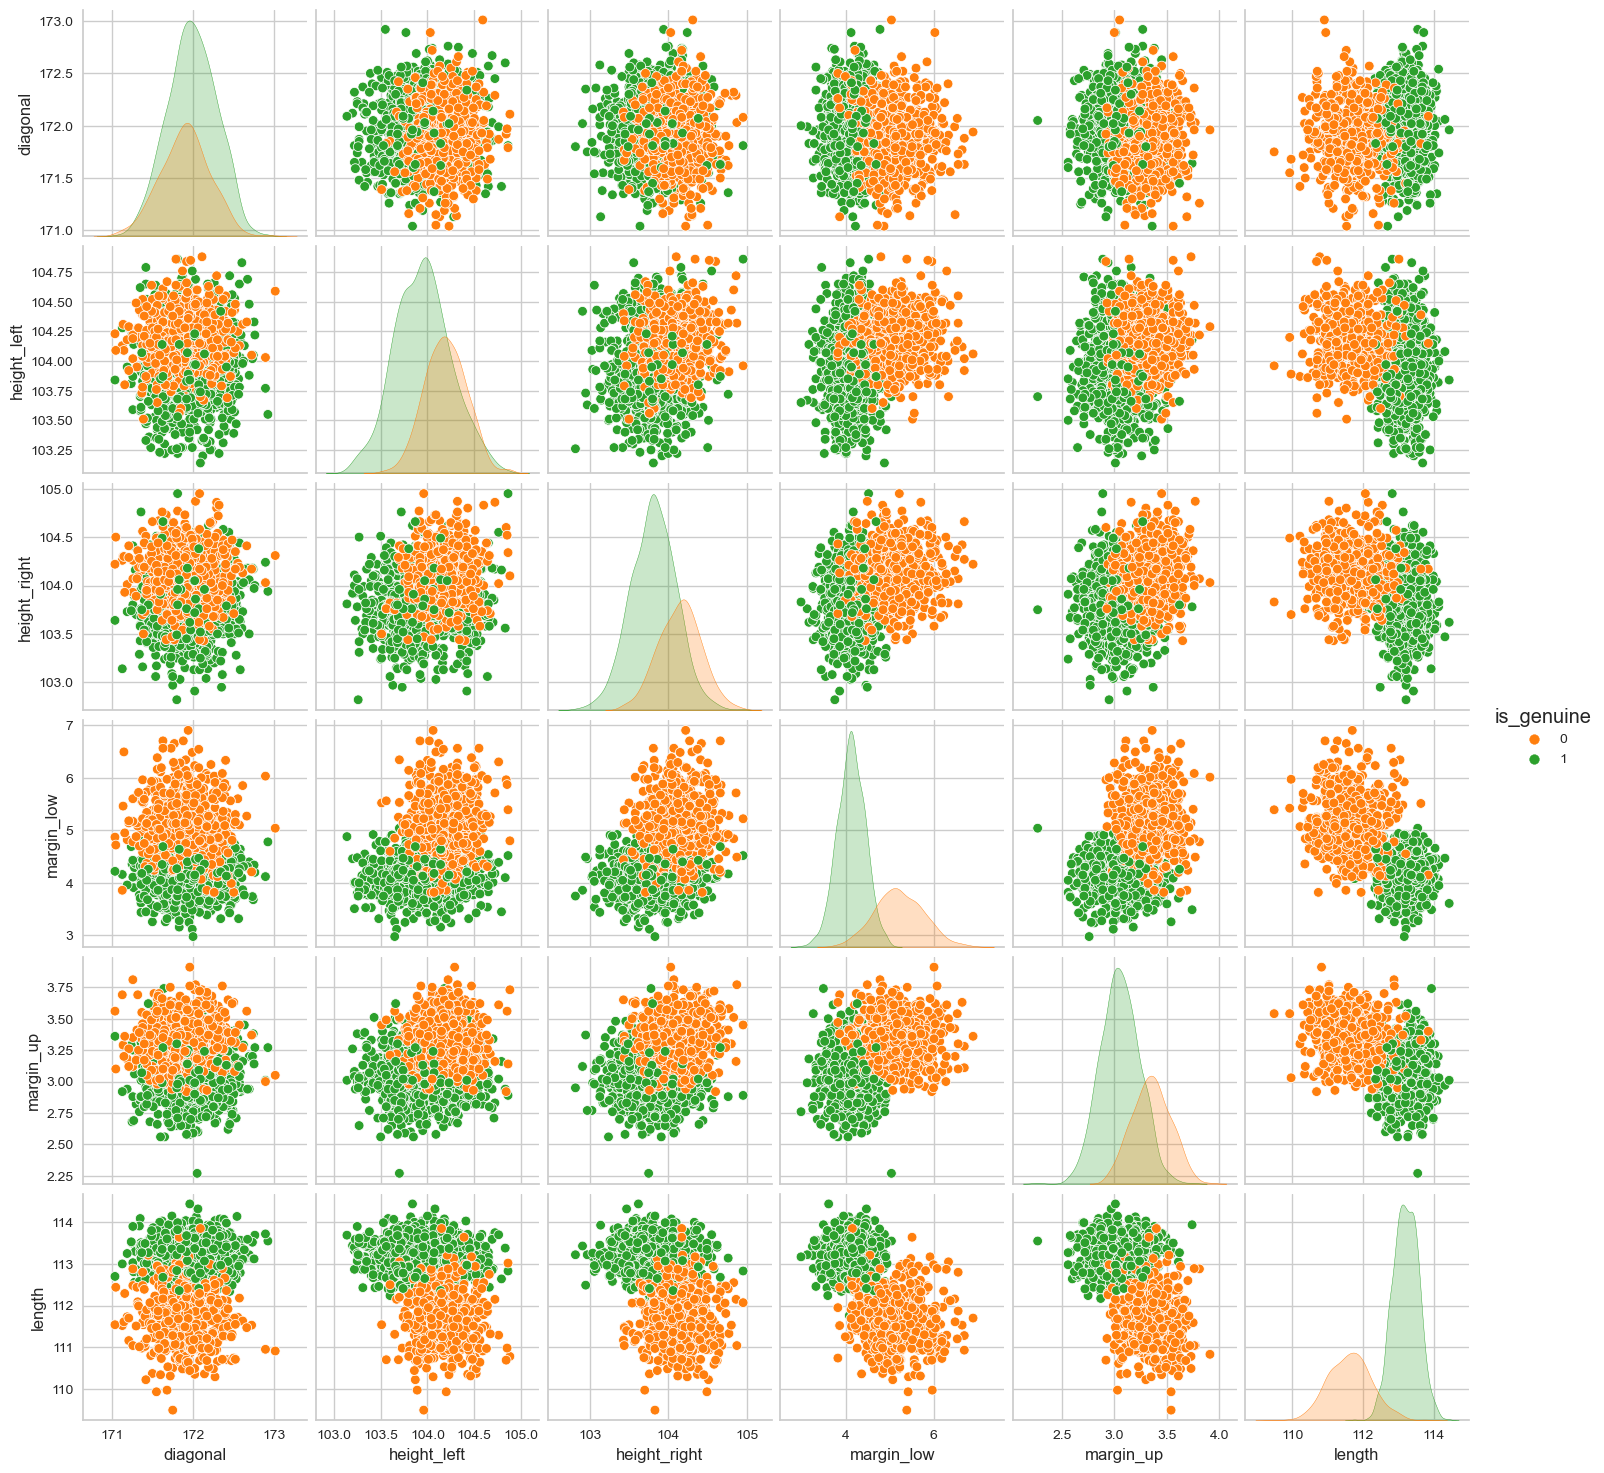

In [289]:
colors = sns.color_palette('tab10')
my_palette ={0: colors[1], 1: colors[2]} 

sns.pairplot(df_complet, hue='is_genuine', palette=my_palette)

In [290]:
# Préparation pour vérification de l'intégrité des données 

# Conversion du type de billet en 0 et 1 : (1 = vrais, 0 = faux)
   
df_original['is_genuine'] = df_original['is_genuine'].apply(set_values, args =(map_dictionary, )) 
df_original.head(20)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0            1    171.81       104.86        104.95        4.52       2.89   
1            1    171.46       103.36        103.66        3.77       2.99   
2            1    172.69       104.48        103.50        4.40       2.94   
3            1    171.36       103.91        103.94        3.62       3.01   
4            1    171.73       104.28        103.46        4.04       3.48   
5            1    172.17       103.74        104.08        4.42       2.95   
6            1    172.34       104.18        103.85        4.58       3.26   
7            1    171.88       103.76        104.08        3.98       2.92   
8            1    172.47       103.92        103.67        4.00       3.25   
9            1    172.47       104.07        104.02        4.04       3.25   
10           1    171.83       104.14        103.62        3.16       3.18   
11           1    171.84       104.59        104.00        3.88       3.27   
12           1    171.89       103.89        103.40        4.11       2.96   
13           1    172.20       104.35        103.67        4.44       3.38   
14           1    172.06       103.87        103.83        4.09       2.92   
15           1    171.73       103.92        103.74        4.43       2.78   
16           1    171.30       104.19        103.70        4.12       2.82   
17           1    171.88       104.47        103.45        4.56       3.33   
18           1    172.47       103.89        104.14        3.74       3.28   
19           1    171.90       103.67        103.15        4.55       3.15   

    length  
0   112.83  
1   113.09  
2   113.16  
3   113.51  
4   112.54  
5   112.81  
6   112.81  
7   113.08  
8   112.85  
9   113.45  
10  113.22  
11  113.08  
12  113.24  
13  113.65  
14  113.19  
15  112.98  
16  112.87  
17  113.01  
18  113.47  
19  113.12

In [291]:
# Tri du df par index 

df_complet = df_complet.sort_index()

In [292]:
df_complet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [293]:
# Comparaison des 2 dfs

df_complet.compare(df_original, align_axis = 'index', keep_equal=False, result_names=('Table_finale', 'Table_originale'))

margin_low
72   Table_finale           4.31
     Table_originale         NaN
99   Table_finale           4.40
     Table_originale         NaN
151  Table_finale           4.43
...                          ...
1347 Table_originale         NaN
1435 Table_finale           5.27
     Table_originale         NaN
1438 Table_finale           5.14
     Table_originale         NaN

[74 rows x 1 columns]

**L'index a bien été conservé, les seules valeurs qui ressortent sont les différences doublées (37x2) entre nos valeurs nulles sur margin_low et les nouvelles valeurs prédites**

In [294]:
# Tri du df par index 

df_complet = df_complet.sort_index()

In [295]:
# Enregistrement du df sans les outliers potentiels 

# Préparation de is_genuine 
df_outliers['is_genuine'] = df_outliers['is_genuine'].apply(set_values, args =(map_dictionary, )) 
df_outliers.head(20)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
636            1    171.13       104.28        103.14        4.16       2.92   
729            1    171.04       103.84        103.64        4.22       3.36   
828            1    172.92       103.55        103.94        4.78       3.27   
842            1    172.89       103.77        104.24        4.12       3.01   
1022           0    172.89       104.03        104.03        6.03       3.00   
1142           0    171.04       104.23        104.22        4.87       3.56   
1277           0    173.01       104.59        104.31        5.04       3.05   
1388           0    171.05       104.09        104.50        4.72       3.10   
1450           0    172.72       104.05        104.17        4.21       3.37   
0              1    171.81       104.86        104.95        4.52       2.89   
292            1    172.09       103.14        103.81        4.88       3.01   
491            1    172.60       104.83        103.56        4.10       2.94   
905            1    171.99       104.76        104.55        4.39       3.02   
965            1    171.42       104.79        104.16        3.45       3.16   
1083           0    171.85       103.60        103.82        4.60       3.21   
1085           0    171.39       103.51        103.50        5.52       3.45   
1090           0    172.11       104.88        104.10        4.80       3.73   
1150           0    171.79       104.86        104.34        5.39       3.14   
1168           0    171.83       103.56        103.76        5.56       3.49   
1310           0    171.92       104.84        104.60        5.96       2.92   

      length  
636   113.00  
729   112.70  
828   113.55  
842   113.72  
1022  110.95  
1142  111.54  
1277  110.91  
1388  112.44  
1450  111.53  
0     112.83  
292   113.69  
491   113.38  
905   113.70  
965   112.64  
1083  112.50  
1085  111.54  
1090  110.78  
1150  113.02  
1168  110.70  
1310  110.69

In [296]:
# Retrait dans une copie 

df_ss_outliers = df_complet.drop(df_outliers.index, axis=0)
df_ss_outliers.shape

(1454, 7)

In [297]:
# Tri du df par index 

df_ss_outliers = df_ss_outliers.sort_index()

In [298]:
# Exportation du fichier sans les outliers

df_ss_outliers.to_csv('Table_sans_outliers.csv')

In [299]:
# Exportation du fichier complet

df_complet.to_csv('Table_finale.csv')